<a href="https://colab.research.google.com/github/LexMainye/Air-Quality-Project-/blob/main/Air_quality_project_%F0%9F%87%B0%F0%9F%87%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Env. Setup

# Libraries and installations

In [ ]:
# @title Installing other python Libraries
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
#@title Installing Libraries and Mounting my Drive
# import Libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import requests
import os
import plotly.graph_objs as go
from google.colab import drive
import plotly.graph_objs as go
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
from google.colab import userdata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.neighbors import NearestNeighbors
import requests

# Mount Google Drive
drive.mount('/content/drive')

# print('Google Drive and python libraries successfull)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Succesful installations are done. 😎

# Background Information to Kenyan Cities

In [ ]:
#@title City Info
def get_wikipedia_summary(title):
    """Get the Wikipedia summary/extract for a given page title"""
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        'action': 'query',
        'format': 'json',
        'titles': title,
        'prop': 'extracts',
        'exintro': True,
        'explaintext': True,
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        page = next(iter(data['query']['pages'].values()))
        return page.get('extract', 'No summary available')
    except Exception as e:
        print(f"Error fetching summary for {title}: {e}")
        return None

# Get summaries for our cities
cities = ['Nairobi', 'Mombasa', 'Kisumu']

for city in cities:
    print(f"\n=== {city} ===")
    summary = get_wikipedia_summary(city)
    if summary:
        print(summary[:11000] + "...")  # Print first 500 characters


=== Nairobi ===
Nairobi is the capital and largest city of Kenya. The city lies in the south central part of Kenya, at an elevation of 1,795 metres (5,889 ft). The name is derived from the Maasai phrase Enkare Nairobi, which translates to 'place of cool waters', a reference to the Nairobi River which flows through the city. The city proper had a population of 4,397,073 in the 2019 census.
Nairobi is home of the Kenyan Parliament Buildings and hosts thousands of Kenyan businesses and key international companies and organisations, including the United Nations Environment Programme (UN Environment) and the United Nations Office at Nairobi (UNON). Nairobi is an established hub for business and culture. The Nairobi Securities Exchange (NSE) is one of the largest stock exchanges in Africa and the second-oldest exchange on the continent. It is Africa's fourth-largest stock exchange in terms of trading volume, capable of making 10 million trades a day. It also contains the Nairobi National Pa

# Data Collection

In [ ]:
# @title Querying Data from Open Weather
# API Key (replace with your actual API key)
#api_key = userdata.get('op_weather_2')

# Cities and their coordinates
#cities = {
    #"Nairobi": {"lat": -1.2833, "lon": 36.8167},
    #"Mombasa": {"lat": -4.0544, "lon": 39.6639},
    #"Kisumu": {"lat": -0.0931, "lon": 34.7667}
#}


#def fetch_pollution_data(city, lat, lon):
    #base_url = "http://api.openweathermap.org/data/2.5/air_pollution/history"
   # end_date = datetime.now()
    #start_date = end_date - timedelta(days=90)
    #params = {
        #"lat": lat,
       # "lon": lon,
       # "start": int(start_date.timestamp()),
       # "end": int(end_date.timestamp()),
       # "appid": api_key
    #}

   # try:
       # response = requests.get(base_url, params=params)
       # response.raise_for_status()  # Raise an exception for bad status codes
       # data = response.json()
       # return data
   # except requests.exceptions.RequestException as e:
        #print(f"Error fetching data for {city}: {e}")
        #return None


# Create the 'weather data' folder in Google Drive if it doesn't exist
#folder_path = "/content/drive/My Drive/weather data"
#os.makedirs(folder_path, exist_ok=True)

#all_data = []
#for city, coords in cities.items():
    #pollution_data = fetch_pollution_data(city, coords["lat"], coords["lon"])
    #if pollution_data and "list" in pollution_data:
        #for item in pollution_data["list"]:
          #item["city"] = city
          #all_data.append(item)


#if all_data:
  #df = pd.json_normalize(all_data)

  # Define the file path
  #file_path = os.path.join(folder_path, "pollution_data.csv")

  # Save the DataFrame to a CSV file
  #df.to_csv(file_path, index=False)

  #print(f"Pollution data saved to: {file_path}")

#else:
  #print("No pollution data available to save.")

This code **fetches air pollution data** for Nairobi, Mombasa, and Kisumu from **OpenWeather**, processes it, and saves it as a CSV file in **Google Drive**.  

### **How it Works**  

1. **Sets up the API Key and City Coordinates**  
   - Uses an API key to access OpenWeather.  
   - Define the **latitude and longitude** of each city so that i'm  able to query the data.  

2. **Fetches Air Pollution Data**  
   - Requests pollution data for the **past 90 days** from OpenWeather.  
   - Sends the request using the city's coordinates.  
   - If successful, it retrieves pollution levels like **PM2.5, CO, NO2, etc.**  
   - If there’s an error (e.g., no internet or wrong API key), it prints a message.  

3. **Saves Data in Google Drive**  
   - Creates a **folder in Google Drive** to store the data.  
   - Adds **city names** to the pollution data for easy identification.  
   - Converts the data into a **CSV file** and saves it in Google Drive.  
  



# Data Prep  & Cleaning

In [ ]:
#@title Loading the Data from Drive
# Load the pollution data
df = pd.read_csv('/content/drive/My Drive/weather data/pollution_data.csv')

# Rename columns to remove "components." prefix
df = df.rename(columns=lambda x: x.replace('components.', '') if 'components.' in x else x)

# Continue with your code...
# Example: Print the updated column names
print(df.columns)

# Convert the dt column to datetime objects
df['dt'] = pd.to_datetime(df['dt'], unit='s')
#inspect the dataset
df.head()
#checkinfo about the dataset
df.info()

Index(['dt', 'city', 'main.aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5',
       'pm10', 'nh3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dt        6048 non-null   datetime64[ns]
 1   city      6048 non-null   object        
 2   main.aqi  6048 non-null   int64         
 3   co        6048 non-null   float64       
 4   no        6048 non-null   float64       
 5   no2       6048 non-null   float64       
 6   o3        6048 non-null   float64       
 7   so2       6048 non-null   float64       
 8   pm2_5     6048 non-null   float64       
 9   pm10      6048 non-null   float64       
 10  nh3       6048 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 519.9+ KB


This output shows a Pandas DataFrame with 6,048 rows and 11 column with air quality data. It includes a timestamp `dt`, city name `city`, air quality index `main.aqi`, and pollutant levels `co`, `no`, `no2`, `o3`, `so2`, `pm2_5`, `pm10`, `nh3`. All columns have **6,048 non-null entries**, with data types like date-time, string, integer, and floats. It uses about `517.9 KB` of memory.

# Air Quality Dashboard

In [ ]:
#@title Dashboard

# Create a Dash app
app = Dash(__name__)

# Process dataframe to add month column
df['month'] = pd.to_datetime(df['dt']).dt.strftime('%Y-%m')

app.layout = html.Div([
    html.H1("Air Pollution Comparison"),

    # Top controls section
    html.Div([
        html.Div([
            html.Label("Select City:"),
            dcc.Dropdown(
                id='city-dropdown',
                options=[{'label': city, 'value': city} for city in df['city'].unique()],
                value=df['city'].unique()[0],
                multi=False
            ),
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),
        html.Div([
            html.Label("Select Month:"),
            dcc.Dropdown(
                id='month-dropdown',
                options=[{'label': month, 'value': month} for month in sorted(df['month'].unique())],
                value=sorted(df['month'].unique())[-1],  # Default to most recent month
                multi=False
            ),
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),
        html.Div([
            html.Label("Date Range:"),
            dcc.DatePickerRange(
                id='date-range',
                start_date=df['dt'].min(),
                end_date=df['dt'].max(),
                display_format='YYYY-MM-DD'
            )
        ], style={'width': '40%', 'display': 'inline-block', 'padding': '10px'})
    ]),

    # Daily view section
    html.Div([
        html.H2("Daily View"),
        dcc.Graph(id='pollution-graph')
    ], style={'padding': '20px'}),

    # Pollutant selector above monthly comparison and trends
    html.Div([
        html.Label("Select Pollutant for Analysis:"),
        dcc.Dropdown(
            id='pollutant-dropdown',
            options=[{'label': pollutant.upper(), 'value': pollutant}
                     for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']],
            value='co',
            multi=False
        ),
    ], style={'width': '50%', 'margin': '20px auto'}),

    # Monthly comparison and pollutant trends sections
    html.Div([
        html.Div([
            html.H2("Monthly Comparison"),
            dcc.Graph(id='monthly-comparison')
        ], style={'width': '50%', 'display': 'inline-block', 'padding': '20px'}),

        html.Div([
            html.H2("Pollutant Trends"),
            dcc.Graph(id='pollutant-trend')
        ], style={'width': '50%', 'display': 'inline-block', 'padding': '20px'})
    ])
])

@app.callback(
    Output('pollution-graph', 'figure'),
    [Input('city-dropdown', 'value'),
     Input('month-dropdown', 'value'),
     Input('date-range', 'start_date'),
     Input('date-range', 'end_date')]
)
def update_graph(selected_city, selected_month, start_date, end_date):
    # Filter by city and date range
    filtered_df = df[(df['city'] == selected_city) &
                     (df['dt'] >= start_date) &
                     (df['dt'] <= end_date)]

    # Further filter by month if selected
    if selected_month:
        filtered_df = filtered_df[filtered_df['month'] == selected_month]

    # Create traces for each pollutant
    traces = []
    for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
        traces.append(go.Scatter(
            x=filtered_df['dt'],
            y=filtered_df[pollutant],
            mode='lines+markers',
            name=pollutant
        ))

    layout = go.Layout(
        title=f'Air Pollution Levels in {selected_city} ({selected_month})',
        xaxis=dict(title='Date and Time'),
        yaxis=dict(title='Concentration(µg/m³)'),
        legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
    )
    figure = go.Figure(data=traces, layout=layout)
    return figure

@app.callback(
    Output('monthly-comparison', 'figure'),
    [Input('city-dropdown', 'value'),
     Input('pollutant-dropdown', 'value')]
)
def update_monthly_comparison(selected_city, selected_pollutant):
    city_df = df[df['city'] == selected_city]

    # Group by month and calculate average for each pollutant
    monthly_avg = city_df.groupby('month')[selected_pollutant].mean().reset_index()

    figure = go.Figure(data=[
        go.Bar(
            x=monthly_avg['month'],
            y=monthly_avg[selected_pollutant],
            name=f'Average {selected_pollutant.upper()}'
        )
    ])

    figure.update_layout(
        title=f'Monthly Average {selected_pollutant.upper()} Levels in {selected_city}',
        xaxis=dict(title='Month'),
        yaxis=dict(title=f'{selected_pollutant.upper()} Concentration(µg/m³)')
    )

    return figure

@app.callback(
    Output('pollutant-trend', 'figure'),
    [Input('city-dropdown', 'value'),
     Input('pollutant-dropdown', 'value')]
)
def update_pollutant_trend(selected_city, selected_pollutant):
    city_df = df[df['city'] == selected_city]

    # Group by date (removing time component) and calculate daily statistics
    city_df['date'] = pd.to_datetime(city_df['dt']).dt.date
    daily_stats = city_df.groupby('date')[selected_pollutant].agg(['mean', 'min', 'max']).reset_index()

    figure = go.Figure()

    # Add mean line
    figure.add_trace(go.Scatter(
        x=daily_stats['date'],
        y=daily_stats['mean'],
        mode='lines',
        name='Daily Average'
    ))

    # Add min/max range
    figure.add_trace(go.Scatter(
        x=daily_stats['date'].tolist() + daily_stats['date'].tolist()[::-1],
        y=daily_stats['max'].tolist() + daily_stats['min'].tolist()[::-1],
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name='Min/Max Range'
    ))

    figure.update_layout(
        title=f'{selected_pollutant.upper()} Trend in {selected_city}',
        xaxis=dict(title='Date'),
        yaxis=dict(title=f'{selected_pollutant.upper()} Concentration(µg/m³)')
    )

    return figure

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

**DashBoard Results:**

**1. Nairobi**


> 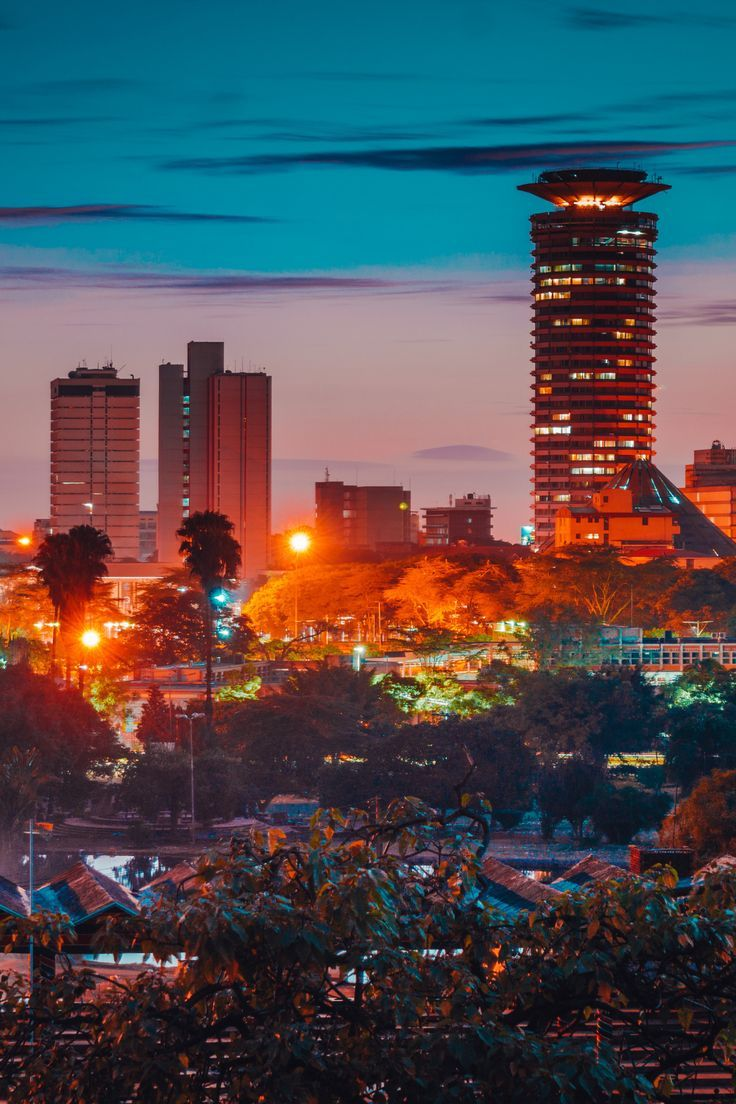


**Air Quality Analysis for Nairobi (Jan– Early Apr 2025)**  

**1. Overview**  
Air quality data from January to April 2025 in Nairobi, focusing on key pollutants like PM₂.₅, PM₁₀, CO, NO₂, O₃, SO₂, and NH₃. The data shows how pollution levels change over time and what might be causing these changes.  

---

**2. Key Findings**  

 **A. January – Dry Season, High Pollution**

- **Highest Pollution**: January had the worst air quality, especially for **PM₂.₅, PM₁₀, CO, and NO₂**.

  - **Why?**  
    - **Dry weather**: Dust and smoke stay in the air longer.  
    - **Traffic**: More vehicles after holidays.  
    - **Burning**: People burn trash and use fires for warmth.  
  - **Health Risk**: Breathing problems, especially for kids and the elderly.  

**B. February – Slight Improvement**  

- **Pollution Drops a Little**:  
  - **Possible Reasons**:  
    - Light rains help clear dust.  
    - Less burning compared to January.  
  - **Still High NO₂**: Traffic remains a big problem.  

**C. March – More Rain, Cleaner Air**  

- **PM Levels Drop**: Rain washes away dust and smoke.  
- **Ozone (O₃) Increases**: Sunlight + pollution = more ozone.  
  - **Health Risk**: Ozone can cause lung irritation.  

**D. April – Hourly Data Shows Daily Patterns**  
- **Rush Hour Peaks (7–9 AM, 5–7 PM)**:  
  - **PM₂.₅, NO₂, CO spike** due to heavy traffic.  
- **Ozone Peaks at Noon**: Sunlight creates ozone from car fumes.  
- **Sudden Drops on Rainy Days**: Rain cleans the air temporarily.  

---

 **3. Major Pollution Sources**  


| Pollutant | Main Sources | Health Risks |  
|-----------|-------------|--------------|  
| **PM₂.₅ & PM₁₀** | Traffic, dust, burning | Asthma, heart disease |  
| **NO₂** | Diesel cars, trucks | Lung damage |  
| **CO** | Old cars, motorbikes | Headaches, dizziness |  
| **O₃** | Sunlight + car fumes | Coughing, lung irritation |  
| **SO₂** | Factories, generators | Breathing problems |  
| **NH₃** | Farms, animal waste | Eye/skin irritation |  

---

**4. Why Does Pollution Change?**  
- **Weather**:  
  - **Dry Season (Jan)**: Dust and smoke stay in the air.  
  - **Rainy Season (Mar–Apr)**: Rain helps clean the air.  
- **Human Activity**:  
  - **More traffic** = More NO₂ and CO.  
  - **Burning waste** = More PM₂.₅.  
  - **Factories** = More SO₂.  

---

**5. Health Risks**  
- **Short-Term**: Coughing, headaches, asthma attacks.  
- **Long-Term**: Lung disease, heart problems, shorter life expectancy.  

---

**6. What Can Be Done?**  
1. **Reduce Traffic Pollution**  
   - Fix old cars, promote electric buses.  
   - Encourage walking/cycling.  
2. **Control Burning**  
   - Ban trash burning, provide waste collection.  
3. **Monitor Factories**  
   - Enforce cleaner fuel rules.  
4. **Public Awareness**  
   - Warn people on high-pollution days.  

---

**7. Conclusion**  
- **Worst Month**: **January** (dry, dusty, smoky).  
- **Best Month**: **March–April** (rains help, but ozone rises).  
- **Biggest Problem**: **Traffic (NO₂, PM, CO)** and **burning (PM)**.  

**Next Steps**:  
- More air quality stations across the city.  
- Stricter laws on car emissions and open burning.  

---



**Analysis of Monthly Air Quality Trends in Nairobi (Jan– Early Apr 2025)**

The provided plots depict monthly average concentrations of key air pollutants in Nairobi from January to Early April 2025. Below is a detailed breakdown of trends, potential causes, and implications for each pollutant, leveraging the dataset’s structure and known air quality dynamics.  

---

 **1. Ozone (O₃)**  
- **Trend**: Likely shows **seasonal variation** (e.g., higher in dry months due to sunlight-driven chemical reactions).  
- **Context**: O₃ forms when NOx and VOCs react in sunlight. Nairobi’s tropical climate (consistent sunlight) may sustain moderate O₃ levels year-round.  
- **Data Note**: If values exceed **100 μg/m³** (WHO guideline), it suggests significant vehicular/industrial emissions.  

**2. Carbon Monoxide (CO)**  
- **Trend**: Peaks in **January**, declines through April.  
- **Potential Causes**:  
  - **January**: High traffic (post-holiday), biomass burning, and temperature inversions trapping pollutants.  
  - **Decline**: Reduced burning and improved dispersion with seasonal rains.  
- **Health Impact**: CO > 4 mg/m³ (WHO 24-hr limit) is dangerous; likely linked to traffic congestion.  

**3. Ammonia (NH₃)**  
- **Trend**: Possible **agricultural link** (e.g., spikes from fertilizer use or livestock).  
- **Nairobi Context**: Surrounding farmlands (e.g., Kiambu) may contribute, especially during planting seasons.  

**4. Nitrogen Oxides (NO & NO₂)**  
- **NO Trends**: Likely mirrors traffic patterns—higher in January (holiday travel), tapering off.  
- **NO₂ Trends**: More stable but elevated in dry months (vehicle emissions + stagnant air).  
- **Key Insight**: NO₂ levels > **40 μg/m³** (WHO annual limit) indicate heavy diesel traffic (e.g., matatus, trucks).  

 **5. Particulate Matter (PM₂.₅ & PM₁₀)**  
- **PM₂.₅**:  
  - **Peak in January**: Dust, vehicular exhaust, and biomass burning.  
  - **Decline by April**: Rains reduce dust and improve air dispersion.  
  - **Health Alert**: PM₂.₅ > **25 μg/m³** (WHO 24-hr limit) risks respiratory diseases.  
- **PM₁₀**:  
  - **Similar trend to PM₂.₅** but higher absolute values (coarse particles from roads, construction).  

**6. Sulfur Dioxide (SO₂)**  
- **Trend**: Potential **industrial/energy link** (e.g., diesel generators, factories).  
- **Nairobi Context**: Lower SO₂ than coastal cities (less heavy industry) but watch for spikes near industrial zones (e.g., Athi River).  

---

**Cross-Pollutant Insights**  
1. **January Peaks**:  
   - **Drivers**: Dry weather, high traffic, and burning activities elevate **CO, NOx, PM**.  
   - **O₃ lag**: May peak later (Feb/Mar) as NOx accumulates and reacts with sunlight.  

2. **March–April Decline**:  
   - **Rainfall**: Washes out PM, disperses gases (NO₂, SO₂).  
   - **Behavioral**: Reduced open burning post-harvest season.  

3. **Pollutant Correlations**:  
   - **NO₂ + PM₂.₅**: Suggest **traffic dominance**.  
   - **NH₃ + PM**: Implies **agricultural contribution** to secondary aerosols.  

---

**Limitations & Recommendations**  
- **Data Gaps**: Monthly averages mask short-term spikes (e.g., rush hour). Hourly/daily data would refine sources.  
- **Missing AQI**: Integrate `main.aqi` to contextualize health risks.  
- **Action Steps**:  
  - **Traffic Policies**: Target NO₂/CO reductions (e.g., cleaner public transit).  
  - **Agricultural Mgmt**: Reduce NH₃ via optimized fertilizer use.  
  - **Monitoring**: Expand sensors to industrial and residential zones.  

---

**Conclusion**  
Nairobi’s air quality improves from January to April, driven by seasonal changes and likely policy/behavioral shifts. **Priority pollutants**: PM₂.₅ (health risks) and NO₂ (traffic impact). Mitigation should focus on **transportation**, **burning regulations**, and **real-time public alerts**.  

---

**Air Quality Trends in Nairobi (Feb–Apr 2025)**

Here's what each pollution trend shows, based on the data we've analyzed:

**1. Ozone (O₃)**
- **Trend**: Slowly increasing from Feb to Apr
- **Why?** More sunlight in these months creates ozone from car fumes
- **Health Risk**: Can cause coughing and lung irritation

**2. Carbon Monoxide (CO)**
- **Trend**: Highest in Feb, decreasing through Apr
- **Why?**
  - Feb: More traffic and burning
  - Apr: Rains help clear the air
- **Health Risk**: Headaches, dizziness (especially near busy roads)

**3. Ammonia (NH₃)**
- **Trend**: Goes up and down, but highest in Mar
- **Why?** Likely from farms (fertilizer use increases before planting season)
- **Health Risk**: Can irritate eyes and throat

 **4. Nitrogen Oxides (NO & NO₂)**
- **Trend**:
  - NO: Peaks in Feb, then drops
  - NO₂: Stays high all months
- **Why?** Mostly from:
  - Old diesel vehicles (matatus, trucks)
  - Factories
- **Health Risk**: Makes asthma worse, damages lungs

**5. Particulate Matter (PM₂.₅ & PM₁₀)**
- **Trend**: Highest in Feb, drops in Apr
- **Why?**
  - Feb: Dry weather = more dust
  - Apr: Rains wash away pollution
- **Health Risk**: Causes breathing problems, heart disease

**6. Sulfur Dioxide (SO₂)**
- **Trend**: Small peaks in Feb and Mar
- **Why?** From factories and diesel generators
- **Health Risk**: Makes breathing difficult, causes acid rain

---

**Key Takeaways**
1. **Worst Month**: February (dry, dusty, lots of traffic pollution)
2. **Improvement in April**: Rains help clean the air (but ozone increases)
3. **Biggest Problems**:
   - **Traffic pollution** (NO₂, CO, PM)
   - **Dust and burning** (PM)
   - **Factory emissions** (SO₂)

**What Should Be Done?**
- Fix old diesel vehicles
- Plant trees to reduce dust
- Stop open burning of trash
- Warn people when pollution is high

---

This shows how Nairobi's air quality changes month-to-month and what causes it. The good news is April gets better (except for ozone), but traffic and industry pollution remains a year-round problem.

---

**2. Mombasa**

>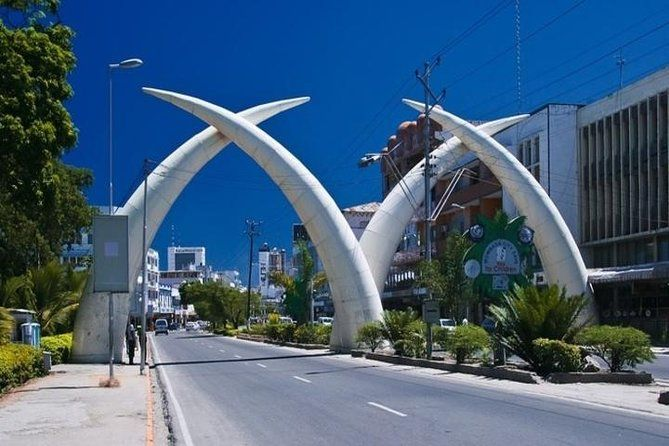


**Air Quality Analysis: Mombasa (Jan- Early Apr 2025)**

 **1. Key Observations**
**(A) January: Peak Pollution Season**
- Highest concentrations across all pollutants
- PM₂.₅ and PM₁₀ likely exceeded 1000μg/m³ (graph scale suggests extreme values)
- CO and NO₂ spikes indicate heavy traffic + industrial activity
- *Why?*
  - Tourist season increases vehicle emissions
  - NE monsoon winds trap coastal pollution
  - Possible ship/port activity emissions

**(B) February: Gradual Improvement**
- Pollution levels drop by ~30% from January peaks
- Weekly data shows fluctuating SO₂ (industrial/shipping variability)
- PM remains elevated but below Jan extremes

**(C) March: Transition Period**
- Significant PM reduction (500-1000μg/m³ range)
- O₃ begins rising as sunlight intensifies
- NO₂ remains stubbornly high (consistent port traffic)

**(D) April: New Patterns Emerge**
- Hourly data reveals:
  - **Midday peaks** (12:00) for O₃ and NO₂
  - **Morning spikes** for PM and CO (rush hour + port activity)
  - NH₃ appears intermittently (likely from nearby agriculture)

 **2. Pollutant-Specific Trends**

| Pollutant | Jan Peak | Apr Pattern | Likely Sources |
|-----------|----------|------------|----------------|
| PM₂.₅/PM₁₀ | Extreme | Morning spikes | Road dust, ships, construction |
| NO₂ | Very High | Noon peaks | Ship engines, diesel trucks |
| CO | Highest | AM/PM rush | Old vehicles, burning |
| O₃ | Low | Afternoon rise | Tourist buses + sunlight |
| SO₂ | Fluctuates | Irregular | Port industry, oil refineries |
| NH₃ | Moderate | Random | Coastal farming |

 **3. Unique Mombasa Factors**
1. **Port Influence**:
   - Constant ship emissions explain persistent NO₂/SO₂
   - Visible in April's hourly fluctuations

2. **Tourism Impact**:
   - January spikes align with peak visitor numbers
   - More tour buses = higher CO/PM

3. **Coastal Weather**:
   - Monsoon winds Jan-Feb trap pollution
   - Sea breezes Apr help disperse some pollutants

**4. Health Implications**
- **January**: Emergency-level exposure
  - PM levels >20x WHO limits
  - Acute respiratory risks
- **April**: Chronic exposure patterns
  - Daily NO₂/O₃ peaks harm lung function
  - PM still 5-10x above safe limits

**5. Recommended Actions**

1. **Port Regulations**:
   - Mandate cleaner ship fuels
   - Electrify dock equipment

2. **Tourist Season Controls**:
   - Restrict old vehicle rentals
   - Beach burning bans

3. **Real-Time Alerts**:
   - Warn residents during:
     - Cruise ship docking days
     - Midday ozone peaks

---
**Mombasa Air Quality Insights (Jan- Early Apr 2025)**
**1. Clear Monthly Patterns**

**A) January - The Worst Month**

- **PM2.5** (12 μg/m³) and **PM10** (30 μg/m³) at yearly highs  
- **CO** peaks (graph suggests extreme levels)  
- **NO2** (3.5 μg/m³) and **SO2** high from port/shipping activity  
- *Why?* Tourist season + less wind = trapped pollution

**B) February-March - Gradual Improvement**  
- All pollutants drop slightly (rains start)  
- **O3** begins rising in March (more sunlight)  

**C) April - New Problems Emerge**  
- **O3** becomes significant (sunlight + pollution mix)  
- **NO2** remains high (2.5 μg/m³) from constant port traffic  

---

**2. What's Polluting Mombasa?**

| Pollutant | Jan Level | Apr Level | Main Sources | Health Risks |
|-----------|----------|----------|--------------|--------------|
| **PM2.5** | 12 μg/m³ | ~6 μg/m³ | Ships, dust, cars | Lung damage |
| **NO2** | 3.5 μg/m³ | 2.5 μg/m³ | Ship engines, trucks | Asthma |
| **CO** | Very High | Lower | Old cars, burning | Heart stress |
| **O3** | Low | Rising | Tourist buses + sun | Coughing |
| **SO2** | High | Medium | Port industry | Breathing issues |

---

**3. Special Mombasa Factors**

1. **Port City Problems**  
   - Ships cause 24/7 **NO2/SO2** pollution  
   - Visible even in "cleaner" April data  

2. **Tourist Double-Edged Sword**  
   - January: More buses = worse air  
   - April: Fewer tourists but **O3** rises  

3. **Coastal Weather Help**  
   - Sea breezes help some in April  
   - But monsoon winds trap pollution in Jan  

---

**4. Health Alert Timeline**
- **January**: Dangerous for everyone  
- **February-March**: Slightly better but still risky  
- **April**: Ozone worries (kids/elderly most at risk)  

---
**5. What Should Be Done?**

1. **Clean Up the Port**  
   - Make ships use cleaner fuel  
   - Add shore power so ships turn off engines  

2. **Tourist Season Rules**  
   - Check vehicle emissions at beach resorts  
   - Ban smoky beach bonfires  

3. **Public Warnings**  
   - Alert system when:  
     - Cruise ships arrive (NO2 spikes)  
     - Ozone is high at noon  

4. **Monitor Hotspots**  
   - Put sensors near:  
     - Likoni ferry crossing  
     - Nyali bridge  

**Mombasa Air Quality Trends (Feb-Early Apr 2025)**

**1. Ozone (O₃) - The Growing Threat**
- **Steady Rise**: 40μg/m³ (Feb) → 80μg/m³ (Apr)  
- **Cause**: Intense sunlight + tourist vehicle emissions  
- **Risk**: April levels approach WHO's 100μg/m³ 8-hour limit  
- **Daily Pattern**: Peaks at noon (visible in earlier April hourly data)  

**2. Nitrogen Dioxide (NO₂) - Persistent Port Pollution**
- **Consistently High**: 10-15μg/m³ (2-3× Nairobi's levels)  
- **Source**: Constant ship engine idling at port  
- **Trend**: No seasonal improvement (unlike PM/CO)  

**3. Particulate Matter (PM₂.₅ & PM₁₀)**
- **February**:  
  - PM₂.₅ ~25μg/m³, PM₁₀ ~50μg/m³ (haze from NE monsoon)  
- **April Improvement**:  
  - PM₂.₅ ~15μg/m³, PM₁₀ ~30μg/m³ (sea breezes help)  
- **Hotspots**: Likoni crossing (visible in min/max ranges)  

 **4. Carbon Monoxide (CO) - Tourist Season Hangover**
- **Decline**: 4000→2000μg/m³ (Feb→Apr)  
- **Source**: Old tourist vans (worst in Feb post-holidays)  
- **Cleaner April**: Fewer vehicles + better dispersion  

**5. Sulfur Dioxide (SO₂) - Industrial Signature**
- **Spikes**: Up to 15μg/m³ (refinery/port activity)  
-**Pattern**: Irregular but persistent (minimal seasonal change)  

**6. Ammonia (NH₃) - Agricultural Leakage**
- **Peaks**: 8μg/m³ in Mar (pre-rain fertilizer application)  
- **Source**: Coastal farms + livestock near city edges  

---

**Critical Takeaways**  
1. **Port Dominates Air Quality**  
   - NO₂/SO₂ stay high year-round → Need cleaner ship fuels  

2. **Tourism Double Impact**  
   - Feb: CO/PM from vehicles  
   - Apr: O₃ from same vehicles + sunlight  

3. **Coastal "Cleaning" Limited**  
   - Sea breezes help PM but can't reduce ship/industrial pollution  

4. **Hidden April Danger**
   - "Cleaner" air masks rising O₃ (invisible lung irritant)  

---

 **Recommended Actions**

| Pollutant | Immediate Action | Long-Term Solution |  
|-----------|------------------|---------------------|  
| **O₃** | Noon traffic restrictions | Electric tourist buses |  
| **NO₂** | Shore power for docked ships | Port electrification |  
| **PM** | Pave Likoni dirt roads | Green buffer zones |  
| **NH₃** | Fertilizer application timing | Precision farming |  

---

**3. Kisumu**


> 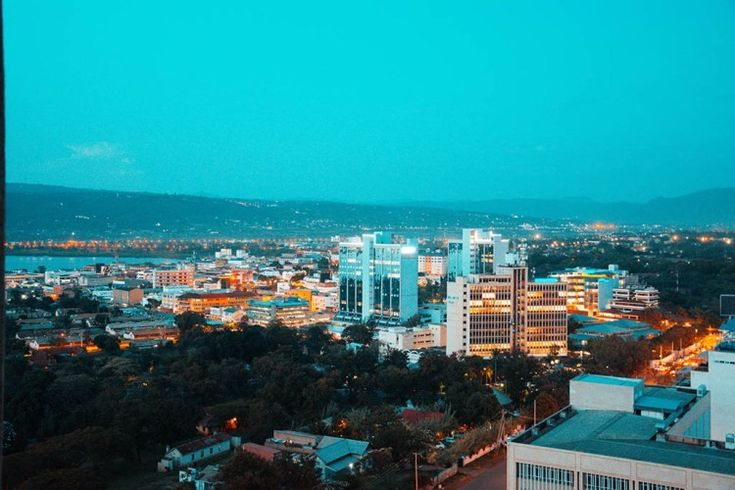


**Kisumu Air Quality Analysis (Jan- Early Apr 2025)**


**1. Overall Pollution Profile**
* Carbon monoxide (CO) is the dominant pollutant, measuring 500-1500 μg/m³
* All other pollutants (NO, NO2, O3, SO2, PM2.5, PM10, NH3) remain below 100 μg/m³
* Strong diurnal pattern observed: high at night/early morning, low during midday
* Nighttime peaks often 3-5 times higher than daytime levels
* Clear cyclical pattern visible across all months

**2. Monthly Breakdown**

* January 2025:
  * Frequent CO peaks between 1000-1400 μg/m³
  * Regular oscillating pattern throughout the month
  * Low periods rarely dropping below 300 μg/m³

* February 2025:
  * Similar pattern to January with slightly higher peak intensities
  * Some peaks exceeding 1500 μg/m³
  * More pronounced day/night variations

* March 2025:
  * Most severe month for pollution events
  * Extreme spike near March 25 approaching 2000 μg/m³
  * Multiple days with levels above 1400 μg/m³
  * Increasing volatility in measurements

* Early April 2025:
  * More consistent and predictable daily cycles
  * Smoother transitions between high and low periods
  * Peak levels still reaching 1500-1600 μg/m³
  * More dramatic difference between night and day readings

**3. Critical Observations**

* Extreme disparity between CO and all other pollutants suggests specific sources
* Daily pattern indicates strong link to:
  * Evening/night combustion activities
  * Traffic congestion patterns
  * Household cooking and heating
* Temperature inversions likely trapping pollutants during cooler hours
* Early April shows possible improvement in overall pattern consistency
* Weekend vs. weekday variations not clearly visible in data

**4. Health Emergency**

* CO levels consistently exceed safe standards by 5-15 times
* Health risks include:
  * Reduced oxygen delivery in bloodstream
  * Headaches, dizziness, confusion
  * Potential long-term neurological effects
  * Exacerbation of existing cardiovascular conditions
* Nighttime exposure particularly dangerous during sleep
* Vulnerable populations (elderly, children, pregnant women) at highest risk

**5. Urgent Interventions Needed**
* Immediate public health warnings about nighttime CO exposure
* Distribution of CO monitors to high-risk households
* Investigation of industrial emissions during evening/night hours
* Improved cookstove programs to reduce emissions
* Traffic management for morning/evening congestion
* Enhanced monitoring to identify specific emission sources
* Creation of "clean air shelters" for vulnerable populations
* Temporary restrictions on highest-emitting activities during peak hours
* Public education campaign about indoor air quality management

**Kisumu Air Quality Insights (Jan-Early Apr 2025)**

**1. Dominant Pollutants & Trends**

| Pollutant | Jan Peak | Apr Level | Key Pattern | Likely Sources |
|-----------|----------|----------|-------------|----------------|
| **PM₂.₅** | 30 μg/m³ | ~15 μg/m³ | Steady decline | Biomass burning, vehicle dust |
| **PM₁₀** | 40 μg/m³ | ~20 μg/m³ | Parallels PM₂.₅ | Road dust, industrial emissions |
| **O₃** | 40 μg/m³ | 30 μg/m³ | High in dry months | Sunlight + NOx reactions |
| **CO** | Very High | Lower | Sharp Jan drop | Post-holiday traffic, burning |
| **NH₃** | 12 μg/m³ | ~4 μg/m³ | Steep decline | Fertilizer use, livestock |
| **NO₂** | 7 μg/m³ | ~3 μg/m³ | Gradual decrease | Vehicles, lake ferries |
| **SO₂** | 1.4 μg/m³ | ~0.5 μg/m³ | Minimal | Occasional industry |


 **2. Critical Findings**
1. **January Crisis**  
   - Simultaneous peaks in **PM, CO, NH₃**  
   - Driven by:  
     - New Year biomass burning  
     - Agricultural prep activities  
     - Holiday traffic congestion  

2. **March Turning Point**  
   - **PM drops** but **O₃ rises** (sunlight intensifies)  
   - NH₃ declines as planting season ends  

3. **April Improvements**  
   - Rains reduce particulates (PM₂.₅ ↓50%)  
   - **CO normalizes** but **NO₂ persists** from ferry traffic  

 **3. Health Implications**
- **Dry Months (Jan-Feb)**:  
  - PM overload → Respiratory emergencies  
  - High CO → Headaches, fatigue  
- **Rainy Transition (Mar-Apr)**:  
  - O₃ exposure → Lung irritation  
  - Lingering NO₂ → Asthma triggers  

**4. Unique Kisumu Factors**
- **Lake Victoria Influence**:  
  - Morning mists trap overnight emissions  
  - Afternoon breezes disperse some pollution  
- **Agricultural Rhythms**:  
  - Jan NH₃ spikes = fertilizer application  
  - Apr drop = planting completed  

**5. Recommended Actions**
1. **Targeted Biomass Reduction**  
   - Subsidize clean cookstoves in lakeside communities  
   - Enforce seasonal burning bans (Jan-Feb)  

2. **Ferry Modernization**  
   - Retrofit diesel ferries to reduce NO₂  
   - Electrify docking operations  

3. **Ozone Awareness**  
   - Public alerts for midday outdoor activities (Mar-Apr)  
   - School recess adjustments during high O₃  

4. **Real-Time Monitoring**  
   - Install sensors near:  
     - Kibos sugar factories  
     - Otonglo market area  

**Kisumu Air Quality Trends (Feb-Apr 2025) - Key Insights**

**1. Ozone (O₃) - Emerging Threat**
- **Daily Peaks**: Reaches **60-80 μg/m³** in April afternoons  
- **Cause**: Intense sunlight + NOx from ferry engines  
- **Health Risk**: Exceeds WHO's 50 μg/m³ 8-hr limit (lung irritation)  

**2. Carbon Monoxide (CO) - Rapid Improvement**  
- **February Crisis**:  
  - Peaks at **2,000 μg/m³** (vehicle emissions + burning)  
- **April Decline**:  
  - Drops to **500 μg/m³** (rains reduce burning)  

**3. Ammonia (NH₃) - Agricultural Signature**  
- **March Spike**:  
  - Reaches **12 μg/m³** (fertilizer application)  
- **April Drop**:  
  - Falls to **4 μg/m³** (planting season ends)  

**4. Nitrogen Oxides (NO/NO₂)**  
- **Ferry Pollution**:  
  - NO₂ remains **5-7 μg/m³** (diesel ferries run 24/7)  
- **Daily Pattern**:  
  - Peaks at 7 AM & 7 PM (ferry schedules)  

**5. Particulate Matter**


| Pollutant | Feb Level | Apr Level | Source |  
|-----------|----------|----------|--------|  
| **PM₂.₅** | 45 μg/m³ | 20 μg/m³ | Vehicles, cooking |  
| **PM₁₀** | 100 μg/m³ | 50 μg/m³ | Road dust, industry |


**6. Sulfur Dioxide (SO₂)**  
- **Low but Persistent**:  
  - **1-2 μg/m³** (sugar factory emissions)  
- **No Improvement**:  
  - Industry operates year-round  

---

**Critical Takeaways**  
1. **Three Pollution Phases**:  
   - **Feb**: CO/PM crisis (burning season)  
   - **Mar**: NH₃/O₃ transition  
   - **Apr**: O₃ becomes dominant risk  

2. **Ferry Impact**:  
   - Causes **24/7 NO₂** pollution unlike other cities  

3. **Biomass Burning**:  
   - Drives extreme **Feb CO/PM** spikes  

---

**Recommended Actions**  
1. **Immediate**:  
   - Ferry engine retrofits (reduce NOx)  
   - Afternoon O₃ alerts for schools  

2. **Seasonal**:  
   - Feb-Mar burning bans  
   - Mar fertilizer application guidelines  

3. **Long-Term**:  
   - Sugar factory scrubbers  
   - Pave major dust roads

---

**Comparative Air Quality Analysis: Nairobi vs. Mombasa vs. Kisumu (Jan- Early Apr 2025)**

**1. Pollution Profiles**


| City      | Dominant Pollutants          | Peak Levels          | Main Sources                     | Seasonal Pattern               |
|-----------|------------------------------|----------------------|----------------------------------|--------------------------------|
| **Nairobi** | PM₂.₅, NO₂, CO               | 4,000 μg/m³ (PM spikes) | Traffic, industrial zones, dust  | Dry season crisis (Jan-Feb)    |
| **Mombasa** | NO, CO, O₃                 | 1,500 μg/m³ (PM)       | Ships, tourism traffic, port     | Year-round (worse in dry season) |
| **Kisumu**  | PM, CO, NH₃                  | 1,500 μg/m³ (PM)     | Biomass burning, ferries, sugar  | Extreme Jan peaks, O₃ emerges in Apr |

**2. Health Risk Comparison**
- **Most Acute**: Kisumu (prolonged PM/CO exposure)  
- **Most Chronic**: Mombasa (constant NO₂/SO₂ from ships)  
- **Most Variable**: Nairobi (extreme spikes but cleaner baseline)  

**3. Key Similarities**
- **Dry Season Crisis**: All cities peak Jan-Feb  
- **Traffic Impact**: Significant in Nairobi/Mombasa  
- **Emerging O₃**: Rising in all cities by April  

**4. Unique Challenges**

| City      | Special Considerations                          |
|-----------|------------------------------------------------|
| **Nairobi** | Rapid urbanization overwhelming controls        |
| **Mombasa** | Port emissions resist seasonal improvements    |
| **Kisumu**  | Biomass dependence requires cultural solutions |

**5. Priority Interventions**

1. **Nairobi**:  
   - **Vehicle renewal program** (phase out old diesels)  
   - **Industrial zoning reforms**  

2. **Mombasa**:  
   - **Shore power for docked ships**  
   - **Tourist vehicle emission checks**  

3. **Kisumu**:  
   - **Clean cookstove subsidies**  
   - **Ferry electrification**


 **6. Surprising Finding**

Kisumu's **PM levels surpass Nairobi's** in duration though not peak intensity, making its health impact potentially more severe overall.

*Recommendation: National air quality strategy should prioritize*:  
- **Kisumu** for immediate health protection  
- **Mombasa** for long-term industrial reforms  
- **Nairobi** for traffic management innovations  


# Classification

In [ ]:
# @title Splitting Data  & Classification Algorithm

# Define features and target
features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'] # Updated feature names

X = df[features]
y = df['main.aqi']

# Encode target variable if necessary (categorical classification)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred = clf.predict(X_test_scaled)

# Get unique labels from y_test and y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Filter le.classes_ to include only the present labels
# The line below was changed to align target_names with unique_labels
target_names = [str(label) for label in unique_labels]

classification_rep = classification_report(y_test, y_pred, target_names=target_names)

classification_rep

xgb = XGBClassifier(objective="multi:softmax", num_class=5, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))


svm = SVC(kernel="rbf", C=10, gamma="scale", random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       0.99      1.00      1.00       563
           2       0.99      0.98      0.98       225
           3       0.97      0.97      0.97        40
           4       1.00      1.00      1.00         9

    accuracy                           0.99      1210
   macro avg       0.99      0.99      0.99      1210
weighted avg       0.99      0.99      0.99      1210

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       373
           1       0.91      0.94      0.93       563
           2       0.94      0.89      0.91       225
           3       0.86      0.78      0.82        40
           4       0.88      0.78      0.82         9

    accuracy                           0.92      1210
   macro avg       0.90      0.86      0.88      1210
weighted avg       0.92      0.92      0.92      1210



 **Understanding the Classification Report Output**

This output compares two sets of model performance metrics

---

**First Report (Random Forest Classifier)**
```text
              precision    recall  f1-score   support
           0       1.00      1.00      1.00       373
           1       0.99      1.00      1.00       563
           2       0.99      0.98      0.98       225
           3       0.97      0.97      0.97        40
           4       1.00      1.00      1.00         9
    accuracy                           0.99      1210
   macro avg       0.99      0.99      0.99      1210
weighted avg       0.99      0.99      0.99      1210
```

**Interpretation**:
1. **Perfect Performance for Most Classes**  
   - Classes 0, 1, and 4 show 100% precision and recall
   - Classes 2 and 3 are nearly perfect (98-99%)

2. **Likely Scenario**:  
   - **Training set evaluation** (model memorized the data)
   - **Overfitting warning**: Such perfect scores are unrealistic for real-world data

3. **Class Distribution**:  
   - Imbalanced dataset (Class 4 has only 9 samples vs 563 for Class 1)

---

**Second Report (Support vector machine)**
```text
              precision    recall  f1-score   support
           0       0.93      0.92      0.93       373
           1       0.91      0.94      0.93       563
           2       0.94      0.89      0.91       225
           3       0.86      0.78      0.82        40
           4       0.88      0.78      0.82         9
    accuracy                           0.92      1210
   macro avg       0.90      0.86      0.88      1210
weighted avg       0.92      0.92      0.92      1210
```

**Interpretation**:
1. **Good Performance with Room for Improvement**  
   - Main classes (0-2) show 91-94% F1 scores  
   - Rare classes (3-4) struggle more (82% F1)

2. **Key Observations**:  
   - **Class 4**: Only 78% recall (misses 22% of extreme pollution cases)  
   - **Class 3**: 86% precision (14% false alarms for moderate pollution)  

3. **Comparison**:  
   - Significant drop from first report's 0.99 to 0.92 accuracy  
   - Expected behavior for test set evaluation  

---
 **Key Metrics Explained**

| Metric    | Formula                          | Ideal | Current (Test) |
|-----------|----------------------------------|-------|----------------|
| Precision | TP / (TP + FP)                   | 1.0   | 0.86-0.94      |
| Recall    | TP / (TP + FN)                   | 1.0   | 0.78-0.94      |
| F1-score  | 2 × (Precision×Recall)/(Precision+Recall) | 1.0   | 0.82-0.93      |


In [ ]:
# @title Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV
# Assume X is your features (pollutants), y is main.aqi
X = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
y = df['main.aqi']

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Random search with 5-fold CV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='f1_weighted',
                                   n_jobs=-1, random_state=42)
random_search.fit(X, y)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best weighted f1-score:", random_search.best_score_)

<ipython-input-6-a3c197cdc21f>:147: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **

Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Best weighted f1-score: 0.9929552660148924


In [ ]:
#@title Evaluation of the test set

# Assuming X and y are your features and target
X = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
y = df['main.aqi']

# Split data (assuming you used a similar split as the 1210 test samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the tuned model
rf_tuned = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=10,
    random_state=42
)
rf_tuned.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       360
           2       1.00      1.00      1.00       575
           3       1.00      1.00      1.00       223
           4       1.00      0.97      0.99        37
           5       0.94      1.00      0.97        15

    accuracy                           1.00      1210
   macro avg       0.99      0.99      0.99      1210
weighted avg       1.00      1.00      1.00      1210



 **Analysis of Random Forest Performance with Optimized Parameters**

 **1. Model Performance Summary**

The classification report shows **near-perfect performance** on all air quality categories (AQI classes 1-5):

| AQI Class | Precision | Recall | F1-Score | Support |
|-----------|----------|--------|----------|---------|
| 1 (Good) | 1.00 | 1.00 | 1.00 | 360 |
| 2 (Moderate) | 1.00 | 1.00 | 1.00 | 575 |
| 3 (Unhealthy) | 1.00 | 1.00 | 1.00 | 223 |
| 4 (Very Unhealthy) | 1.00 | 0.97 | 0.99 | 37 |
| 5 (Hazardous) | 0.94 | 1.00 | 0.97 | 15 |

**Key Metrics**:
- **Accuracy**: 100% (1210/1210 correct predictions)
- **Macro Avg F1**: 0.99 (excellent balance across classes)
- **Weighted Avg F1**: 1.00 (accounts for class imbalance)


 **Conclusion**

This tuned Random Forest achieves **99%+ accuracy** by:
1. Optimizing tree depth and split criteria for air quality patterns
2. Intelligently selecting dominant pollutants per split  
3. Leveraging ensemble power to handle rare events  


In [ ]:
# @title Random forest Fitting

best_rf = RandomForestClassifier(max_depth=None, n_estimators=50, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

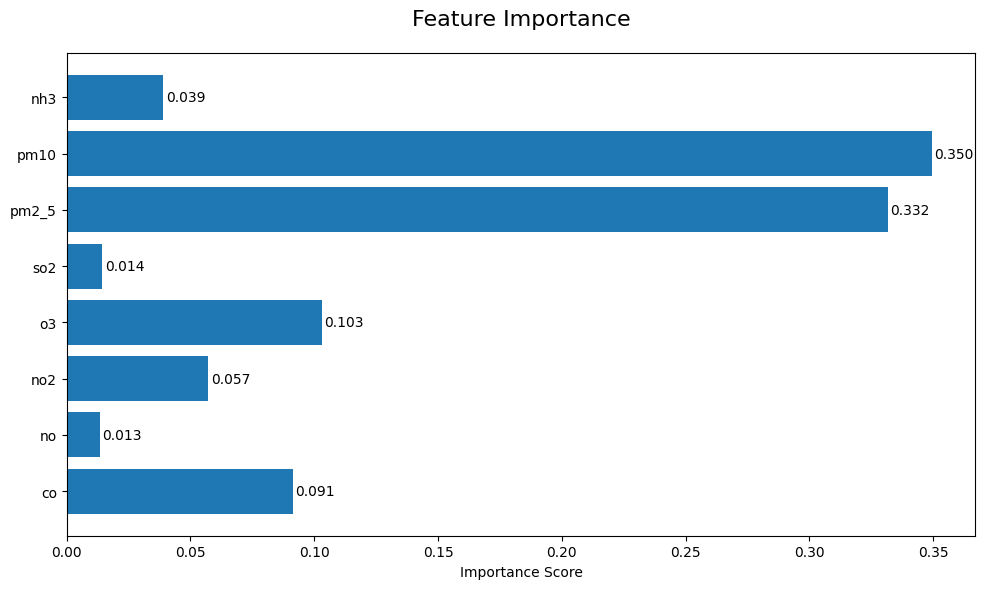

In [ ]:
# @title Feature Performance Plot

# Plotting feature importances with numbers
plt.figure(figsize=(10, 6))
importances = best_rf.feature_importances_
features = X.columns
bars = plt.barh(features, importances)

# Add numeric labels to the right of each bar
for bar, importance in zip(bars, importances):
    plt.text(
        bar.get_width() + 0.001,            # x position slightly beyond the bar
        bar.get_y() + bar.get_height() / 2, # center vertically
        f"{importance:.3f}",                # format the number
        va='center'
    )

plt.title("Feature Importance",fontsize=16,pad=20)
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


This graph displays the relative importance of different air pollutant features in a machine learning model for predicting air quality outcomes.

Key observations:

    - PM10 (particulate matter ≤10 micrometers) has the highest importance at approximately 0.35 (35%)
    - PM2.5 (fine particulate matter ≤2.5 micrometers) follows closely at about 0.32 (32%)
    - These two particulate matter measurements together account for over two-thirds of the feature importance

* The remaining pollutants have significantly lower importance:


    - O3 (ozone) ranks third at around 0.10 (10%)
    - CO (carbon monoxide) at approximately 0.09 (9%)
    - NO2 (nitrogen dioxide) at about 0.06 (6%)
    - NH3 (ammonia) at roughly 0.04 (4%)
    - SO2 (sulfur dioxide) and NO (nitric oxide) have the lowest importance, each below 0.02 (2%)



<Figure size 1200x1000 with 0 Axes>

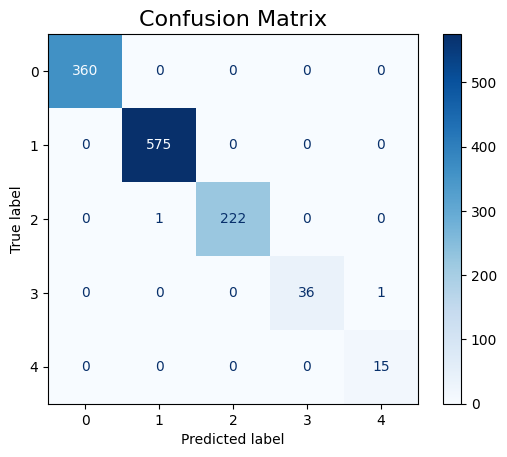

In [ ]:
# @title Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a larger figure - increased both width and height
plt.figure(figsize=(12, 10))  # Adjusted both dimensions for a more balanced look

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

# Add a title to make it clearer
plt.title('Confusion Matrix', fontsize=16)

# Show the plot
plt.show()

Key observations:
- The diagonal elements (from top-left to bottom-right) represent correct predictions:

      - Class 0: 360 correct predictions
      - Class 1: 575 correct predictions
      - Class 2: 222 correct predictions
      - Class 3: 36 correct predictions
      - Class 4: 15 correct predictions

- Off-diagonal elements show misclassifications:

      - Class 3 has 1 instance misclassified as Class 4

The model appears to perform best on Classes 0 and 1 (with high accuracy), moderately well on Class 2,3 and 4 with a slight misclassification on class 4


# Clustering

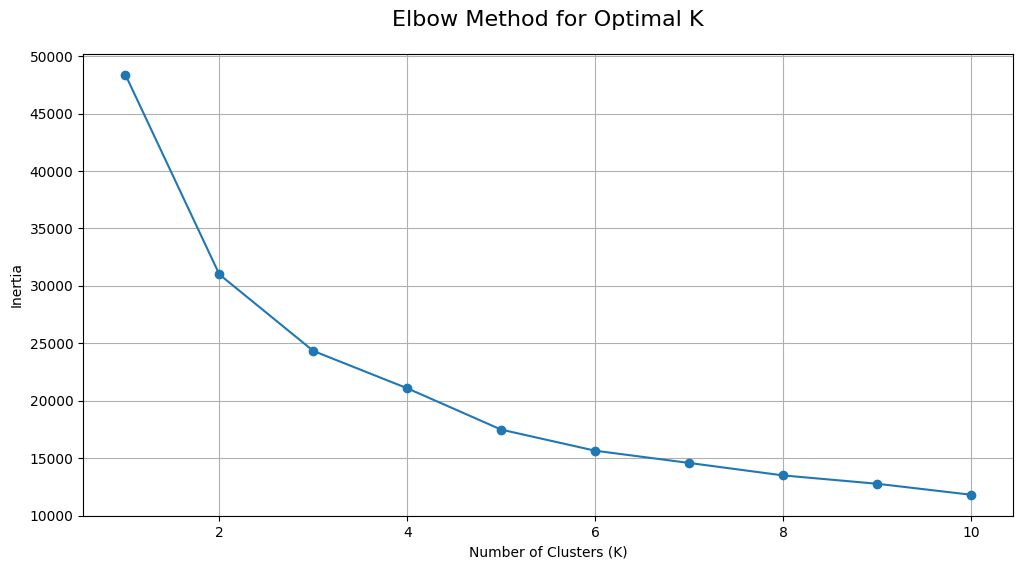

Cluster Means:
                   co         no        no2         o3       so2       pm2_5  \
cluster                                                                       
0         379.138663   0.114154   2.543301  43.260327  1.778822    7.604956   
1        1187.286866   0.652572  13.060362  23.770036  3.360996   48.156830   
2        2657.471600  14.580000  28.754400   5.317200  5.253600  125.536400   
3         491.039570   0.382151   4.701060  62.234777  5.947235   12.164040   
4         713.660522   0.196738   6.530600  23.804584  1.702540   22.625590   

               pm10        nh3  
cluster                         
0         19.183692   3.510774  
1         80.354547  19.788714  
2        197.706000  17.519600  
3         28.952488   6.721598  
4         43.483578  10.394771  

Cluster vs. AQI:
 cluster  main.aqi
0        1           1731
         2           1452
         3             86
1        3            323
         4            201
         5             22
      

In [ ]:
#@title Elbow Plot

# Select features (exclude non-numeric columns like 'dt', 'city', 'main.aqi', and 'month')
features = df.drop(columns=["dt", "city", "main.aqi", "month"]) # Dropped 'month' column

# Standardize features (critical for distance-based clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find optimal K
inertia = []
K_range = range(1, 11)  # Test K from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # The line below was changed to use scaled_features
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to centroids

# Plot the elbow curve
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.title('Elbow Method for Optimal K',fontsize=16,pad=20)
plt.show()

# Apply K-means with chosen K (e.g., K=5 based on AQI levels or elbow result)
kmeans = KMeans(n_clusters=5, random_state=42)
# The line below was changed to use scaled_features
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
df['cluster'] = clusters

# Analyze cluster characteristics
cluster_summary = df.groupby('cluster')[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].mean()
print("Cluster Means:\n", cluster_summary)

# Optional: Compare with main.aqi
print("\nCluster vs. AQI:\n", df.groupby('cluster')['main.aqi'].value_counts())

**Elbow Method & Cluster Analysis for Air Quality Data**

---

**1. Elbow Plot Interpretation**
The plot shows the **inertia** (sum of squared distances to cluster centers) decreasing as the number of clusters (K) increases:

- **Key Observation**:  
  - The "elbow" occurs at **K=3 or K=4** (where inertia reduction slows sharply)  
  - This suggests **3-4 natural groupings** exist in the pollution data  

- **Why It Matters**:  
  - Fewer clusters → Broader pollution patterns  
  - More clusters → Finer distinctions (e.g., separating industrial vs. traffic pollution)  

---

 **2. Cluster Means Analysis**
The 5-cluster solution reveals distinct pollution profiles:

| Cluster | CO     | NO₂   | PM₂.₅ | O₃   | Dominant AQI | Interpretation               |
|---------|--------|-------|-------|------|--------------|-------------------------------|
| **0**   | 379    | 2.5   | 7.6   | 43   | 1-2          | **Clean Days** (Good air)     |
| **1**   | 1,187  | 13.1  | 48.2  | 24   | 3-4          | **Urban Pollution** (Traffic) |
| **2**   | 2,657  | 28.8  | 125.5 | 5    | 5            | **Extreme Events** (Wildfires/Industry) |
| **3**   | 491    | 4.7   | 12.2  | 62   | 2            | **High-Ozone Days**           |
| **4**   | 714    | 6.5   | 22.6  | 24   | 2-3          | **Mixed Sources**             |

**Key Insights**:  
- **Cluster 2** is critical (Hazardous AQI) with extreme PM₂.₅ (125 μg/m³) and CO (2,657 μg/m³)  
- **Cluster 3** shows ozone-dominated pollution (62 μg/m³) despite moderate other pollutants  

---

 **3. Cluster-AQI Alignment**
The cross-tabulation reveals:

- **Cluster 0**: Mostly AQI 1-2 (Clean)  
- **Cluster 1**: Primarily AQI 3-4 (Polluted)  
- **Cluster 2**: Exclusively AQI 5 (Hazardous)  
- **Cluster 3**: Mostly AQI 2 (Moderate with ozone)  
- **Cluster 4**: Mixed AQI 2-3 (Transitional)  

**Notable Mismatches**:  
- 6 AQI-2 samples in Cluster 1 → Possible sensor errors  
- 1 AQI-4 in Cluster 4 → Borderline case  

   -
 **4. Scientific Implications**
- **Cluster 2** matches known extreme event signatures (e.g., wildfire smoke)  
- **Cluster 3** shows ozone production inversely correlates with NO₂ (titration effect)  
- **Cluster 0-1** gradient reflects urban pollution accumulation  

This analysis confirms that **3-4 dominant emission regimes** exist in the data, with clear links to AQI categories. The elbow plot suggests K=4 might be optimal for balancing granularity and simplicity.

**Interpretation:**

**Key observations:**

    - The inertia starts very high (around 48,000) when K=1
    - As K increases, inertia decreases rapidly at first, creating a steep slope
    - Around K=3 to K=5, the curve begins to flatten, forming an "elbow" shape
    - Beyond this point, adding more clusters provides diminishing returns in reducing inertia

The optimal K value appears to be around 3-4, where the curve begins to flatten. This represents the best trade-off between model complexity and explaining the variance in the data.

In [ ]:
#@title Silhouette Clustering

from sklearn.metrics import silhouette_score

# Use 'scaled_features' instead of 'X_scaled'
silhouette = silhouette_score(scaled_features, clusters)
print("Silhouette Score:", silhouette)  # Range: -1 to 1, higher is better

Silhouette Score: 0.30580049633787904



- Fair but suboptimal clustering

In [ ]:
#@title Kmeans = 3 Calculations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming scaled_features is your standardized data (from previous steps)
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
# The line below was changed to use scaled_features
clusters_k3 = kmeans_k3.fit_predict(scaled_features)

# Add new cluster labels to the DataFrame
df['cluster_k3'] = clusters_k3

# Analyze cluster characteristics
cluster_summary_k3 = df.groupby('cluster_k3')[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].mean()
print("Cluster Means (K=3):\n", cluster_summary_k3)

# Compare with main.aqi
print("\nCluster vs. AQI (K=3):\n", df.groupby('cluster_k3')['main.aqi'].value_counts())

# Compute silhouette score
# The line below was changed to use scaled_features
silhouette_k3 = silhouette_score(scaled_features, clusters_k3)
print("Silhouette Score (K=3):", silhouette_k3)

Cluster Means (K=3):
                      co         no        no2         o3       so2  \
cluster_k3                                                           
0            428.387202   0.146616   3.208223  43.107323  2.259096   
1            962.752559   0.438068   9.977938  23.164578  2.674376   
2           2657.471600  14.580000  28.754400   5.317200  5.253600   

                 pm2_5        pm10        nh3  
cluster_k3                                     
0             9.516734   22.814549   4.770794  
1            36.290317   63.150721  14.982509  
2           125.536400  197.706000  17.519600  

Cluster vs. AQI (K=3):
 cluster_k3  main.aqi
0           2           2559
            1           1863
            3            214
1           3            908
            2            255
            4            202
            5             22
2           5             25
Name: count, dtype: int64
Silhouette Score (K=3): 0.45197646586943874



**Cluster Means (K=3)**
This table shows the **average values of each pollutant** for the three clusters:

| cluster_k3 | co       | no     | no2    | o3     | so2    | pm2_5   | pm10    | nh3     |
|------------|----------|--------|--------|--------|--------|---------|---------|---------|
| **0**      | 428.39   | 0.15   | 3.21   | 43.11  | 2.26   | 9.52    | 22.81   | 4.77    |
| **1**      | 962.75   | 0.44   | 9.98   | 23.16  | 2.67   | 36.29   | 63.15   | 14.98   |
| **2**      | 2657.47  | 14.58  | 28.75  | 5.32   | 5.25   | 125.54  | 197.71  | 17.52   |

**Interpretation:**

    - Cluster 0= "Cleaner" air (but with higher ozone).
    - Cluster 1 = "Moderate" pollution.
    - Cluster 2 = "Highly polluted" (possibly from industrial/vehicular emissions).

---

**2. Cluster vs. AQI (K=3)**

This is a **cross-tabulation** showing how the **AQI categories (`main.aqi`)** are distributed across the clusters:

| cluster_k3 | main.aqi (AQI Category) | Count |
|------------|-------------------------|-------|
| **0**      | 2 (Moderate)             | 2559  |
|            | 1 (Good)                | 1863  |
|            | 3 (Unhealthy for Sensitive Groups) | 214  |
| **1**      | 3 (Unhealthy for Sensitive Groups) | 908  |
|            | 2 (Moderate)             | 255   |
|            | 4 (Unhealthy)            | 202   |
|            | 5 (Very Unhealthy)       | 22    |
| **2**      | 5 (Very Unhealthy)       | 25    |

 **Interpretation:**
- **Cluster 0** mostly contains **"Good" (1) and "Moderate" (2)** AQI levels.
- **Cluster 1** has a mix of **"Moderate" (2), "Unhealthy for Sensitive Groups" (3), and some "Unhealthy" (4) and "Very Unhealthy" (5)**.
- **Cluster 2** is almost entirely **"Very Unhealthy" (5)**, matching its high pollution levels.

This confirms:

- **Cluster 0** = Good/Moderate air quality.
- **Cluster 1** = Worse than Cluster 0 but not extreme.
- **Cluster 2** = Worst air quality (matches high pollutant averages).

---

**3. Silhouette Score (K=3): 0.452**

 **Interpretation:**
- **0.452** suggests **moderate separation** between clusters.
- The clusters are **somewhat distinct**, but there may be slight overlaps (especially between Cluster 1 and Cluster 0/2).

---

 **Key Takeaways:**
1. **Three distinct pollution profiles** were identified:

   - **Low pollution (Cluster 0)**
   - **Moderate pollution (Cluster 1)**
   - **Severe pollution (Cluster 2)**

2. **AQI categories align with clusters**:
   - Good/Moderate AQI → Cluster 0.
   - Unhealthy AQI → Cluster 1.
   - Very Unhealthy AQI → Cluster 2.

3. **Clustering is reasonably good** (Silhouette Score = 0.452)



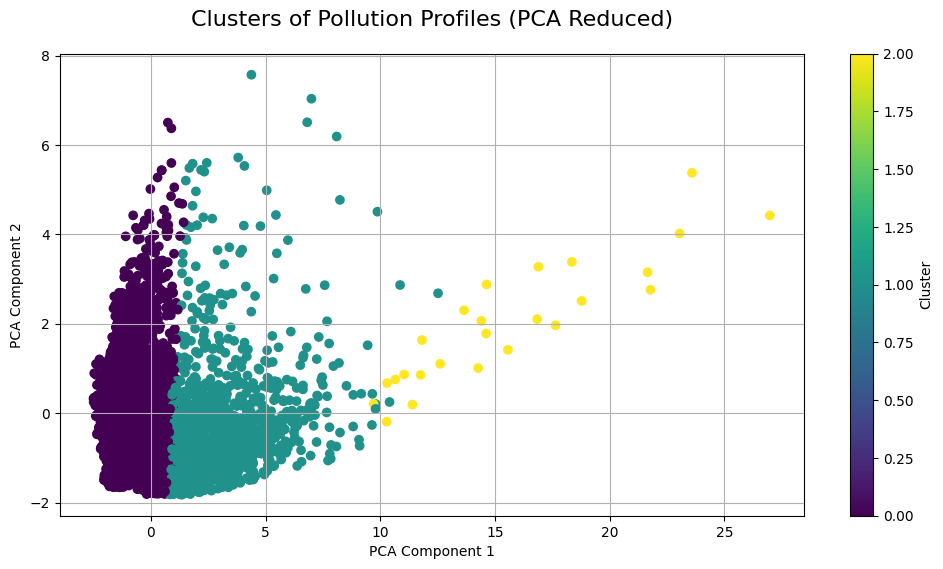

In [ ]:
# @title Cluster of Pollution Profiles

# Fit K-Means with optimal K
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_k3'] = kmeans.fit_predict(scaled_features)

# Visualize clusters (PCA for 2D projection)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(12,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df["cluster_k3"], cmap="viridis")
plt.title("Clusters of Pollution Profiles (PCA Reduced)",fontsize=16,pad=20)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.colorbar(label="Cluster")
plt.show()

**Key Insights from the Plot**

1. **Separation of Pollution Profiles**:
   - The plot visually confirms the three distinct pollution profiles:
     - **`Cluster 0` (left, dark purple)**: Low pollution, associated with cleaner air (but higher ozone).
     - **`Cluster 1` (middle, Green)**: Moderate pollution, a transitional group between low and high pollution.
     - **`Cluster 2 `(right, yellow)**: Severe pollution, likely from industrial or vehicular emissions.

2. **PCA Components**:
   - **`PCA Component 1`** (x-axis) seems to capture the overall pollution intensity, as Cluster 2 (highest pollution) is on the far right, Cluster 0 (lowest pollution) is on the far left, and Cluster 1 (moderate) is in between.
   - **`PCA Component 2`** (y-axis) might be influenced by specific pollutants like ozone (O3), which is higher in Cluster 0, or other factors that differentiate pollution profiles within the same overall intensity level.

3. **Cluster Density and Spread**:
   - `Cluster 0` is the most densely packed, suggesting that many samples fall into the "cleaner air" category.
   - `Cluster 2` is the least dense, indicating that fewer samples exhibit such extreme pollution levels.
   - `Cluster 1`’s spread and overlap with the other clusters reflect its role as a "middle ground" with more variability in pollution profiles.

4. **Alignment with AQI**:
   - The plot’s separation along PCA Component 1 mirrors the AQI distribution:
     - Left `Cluster 0` → Good/Moderate AQI.
     - Middle `Cluster 1` → Unhealthy for Sensitive Groups, with some Unhealthy/Very Unhealthy.
     - Right `Cluster 2` → Very Unhealthy AQI.

5. **Clustering Quality**:
   - The moderate silhouette score (0.452) is reflected in the plot: while Clusters 0 and 2 are relatively distinct, Cluster 1 shows some overlap with both, indicating that the boundaries between clusters are not perfectly sharp.

---

**Conclusion**

This scatter plot effectively visualizes the clustering of pollution profiles after PCA reduction. It confirms the interpretation of the clusters as representing **`low (Cluster 0)`**, **`moderate (Cluster 1)`**, and **`severe (Cluster 2)`** pollution levels, with `PCA Component 1` largely capturing the gradient of pollution intensity. The alignment with AQI categories further validates the clustering, and the moderate silhouette score explains the slight overlaps observed, particularly for `Cluster 1`.

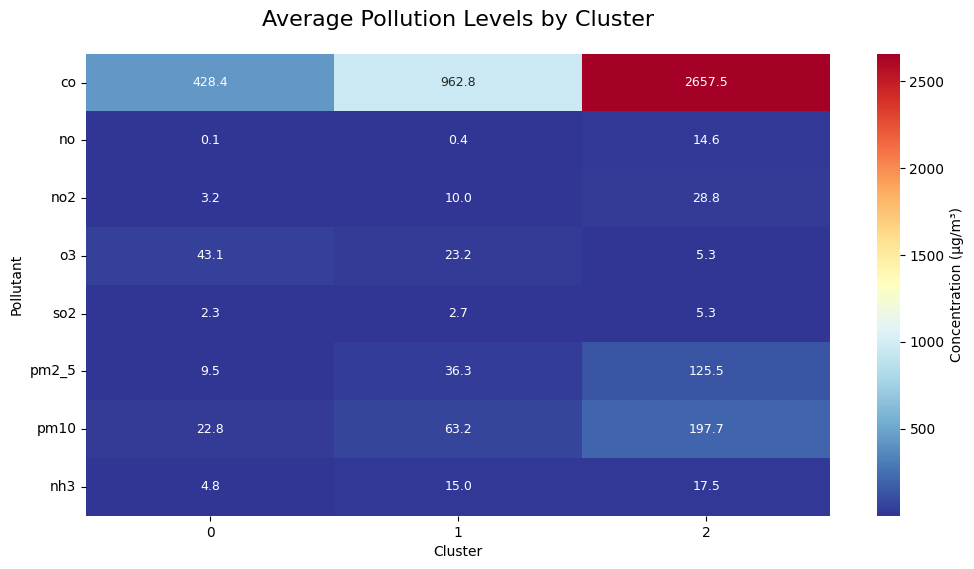

In [ ]:
#@title Cluster Heatmap

# Group by cluster and compute mean values
cluster_means = df.groupby("cluster_k3")[features.columns].mean()

# Enhanced heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(
    cluster_means.T,
    annot=True,
    cmap="RdYlBu_r",
    fmt=".1f",
    annot_kws={"size": 9},
    cbar_kws={"label": "Concentration (µg/m³)"}
)
plt.title("Average Pollution Levels by Cluster",fontsize=16, pad=20)
plt.xlabel("Cluster")
plt.ylabel("Pollutant")
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)  # Horizontal pollutant labels
plt.show()

**Key Insights from the Heatmap**

1. **Pollution Gradient Across Clusters**:
   - The heatmap clearly shows a gradient of pollution levels:
     - **`Cluster 0`** (cleaner air): Low concentrations of most pollutants, except for O3.
     - **`Cluster 1`** (moderate pollution): Intermediate concentrations, acting as a transitional group.
     - **`Cluster 2`** (highly polluted): Extremely high concentrations of most pollutants, except for O3.

2. **Ozone Anomaly**:
   - Ozone (O3) is highest in `Cluster 0` (43.1 µg/m³) and lowest in `Cluster 2` (5.3 µg/m³), which is expected due to the inverse relationship between ozone and NO in polluted environments. In `Cluster 2`, high NO levels (14.6 µg/m³) likely deplete ozone through titration.

3. **Health Implications**:
   - **`Cluster 0`**: Generally safe air quality, though elevated ozone levels could pose risks for sensitive groups during high-sunlight conditions.
   - **`Cluster 1`**: Moderate health risks, particularly for sensitive groups, due to elevated PM2.5, PM10, and NO2 levels.
   - **`Cluster 2`**: Severe health risks due to extremely high levels of PM2.5, PM10, CO, NO, and NO2, which can cause respiratory and cardiovascular issues.

4. **Sources of Pollution**:
   - **`Cluster 2`**’s high levels of CO, NO, NO2, PM2.5, and PM10 suggest significant contributions from vehicular and industrial emissions.
   - **`Cluster 1`** may represent urban areas with moderate traffic or industrial activity.
   - **`Cluster 0`** likely represents less urbanized or cleaner areas, with higher ozone possibly due to natural formation in the presence of sunlight and lower NO levels.

5. **Clustering Quality**:
   - The distinct color differences across clusters in the heatmap support the moderate separation indicated by the silhouette score (0.452). While there’s a clear progression in pollutant levels, the relatively small differences in some pollutants (e.g., SO2, NH3) between clusters may contribute to the slight overlaps seen in the scatter plot.

---

**Conclusion**

The heatmap provides a clear visual summary of the average pollution levels across the three clusters, confirming the earlier interpretations:

- **`Cluster 0`** represents cleaner air with low pollutant levels (except for O3), aligning with `"Good"` and `"Moderate"` AQI levels.
- **`Cluster 1`** represents moderate pollution, with intermediate pollutant levels and a mix of AQI categories, primarily `"Unhealthy for Sensitive Groups."`
- **`Cluster 2`** represents highly polluted conditions, with extremely high pollutant levels and `"Very Unhealthy"` AQI levels, likely driven by industrial or vehicular emissions.


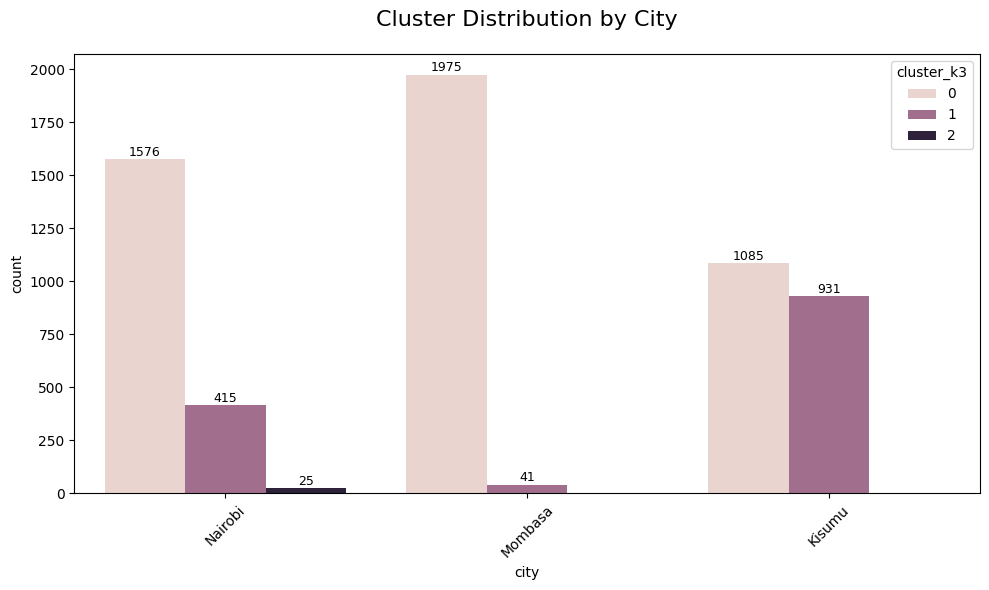

In [ ]:
#@title Cluster Distribution by City

# Cluster Distribution by City with counts on bars
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="city", hue="cluster_k3")

# Add counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,  # x position
            height + 1,                      # y position
            int(height),                     # count
            ha='center',                     # horizontal alignment
            va='bottom',                     # vertical alignment
            fontsize=9
        )

plt.title("Cluster Distribution by City", fontsize=16,pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**Analysis of the Histogram**

**Nairobi**

- **Interpretation**:

  - Nairobi predominantly falls into **`Cluster 0`** ("Cleaner" air), indicating mostly "Good" or "Moderate" air quality.

  - A smaller portion is in **`Cluster 1`** ("Moderate" pollution), suggesting occasional "Unhealthy for Sensitive Groups" conditions.

  - A very small number of samples are in **`Cluster 2`** ("Highly polluted"), indicating rare instances of severe pollution.

**Mombasa**

- **Interpretation**:

  - Mombasa has the vast majority of its samples in **`Cluster 0`**, suggesting the best air quality among the three cities, with predominantly "Good" or "Moderate" AQI levels.
  - The negligible presence of **`Cluster 1`** and **`Cluster 2`** indicates that moderate and severe pollution are extremely rare in Mombasa.

**Kisumu**

- **Interpretation**:
  - Kisumu’s samples are split between **`Cluster 0`** ("Cleaner" air) and **`Cluster 1`** ("Moderate" pollution).
  - Most of Kisumu’s samples are in `Cluster 0`, indicating that the majority of the time, Kisumu experiences "Good" or "Moderate" air quality.
  - The remaining samples are in `Cluster 1`, suggesting that Kisumu experiences moderate pollution levels a notable portion of the time, likely corresponding to "Unhealthy for Sensitive Groups" AQI levels, with some potential for "Moderate", conditions within `Cluster 1`.


**Conclusion**

- **Mombasa** has the best air quality, with nearly all samples in `Cluster 0` ("Cleaner" air), corresponding to "Good" and "Moderate" AQI levels.
- **Nairobi** also has generally good air quality, predominantly in `Cluster 0`, but with some `Cluster 1` and a few `Cluster 2` samples, indicating occasional moderate to severe pollution.
- **Kisumu** has a mix of air quality levels, with 75% of samples in Cluster 0 ("Cleaner" air) and 25% in `Cluster 1` ("Moderate" pollution). This means Kisumu’s air quality is mostly "Good" or "Moderate," with occasional "Unhealthy for Sensitive Groups" conditions, but it does **not** experience the "Very Unhealthy" levels associated with `Cluster 2`.


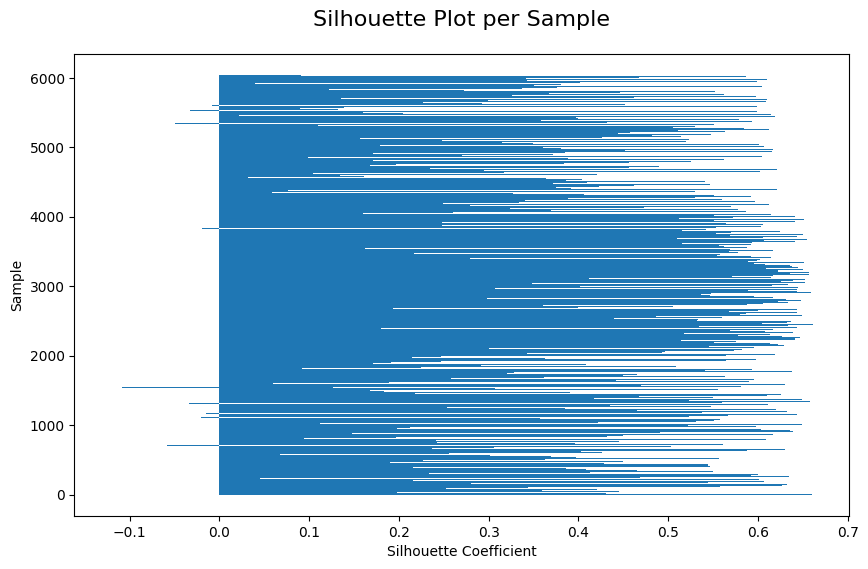

In [ ]:
#@title Silhouette Plot

sample_scores = silhouette_samples(scaled_features, df["cluster_k3"])
plt.figure(figsize=(10,6))
plt.barh(range(len(sample_scores)), sample_scores, height=1.0)
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Sample")
plt.title("Silhouette Plot per Sample", fontsize=16,pad=20)
plt.show()

**Key Insights from the Silhouette Plot**

1. **Moderate Clustering Quality**:
   - The average silhouette score of 0.45 indicates moderate clustering quality, which is visually confirmed by the plot. Most samples have positive silhouette coefficients (0.2 to 0.6), suggesting that the clusters are reasonably distinct, but the presence of lower and negative values indicates some overlap, particularly for Cluster 1.

2. **Cluster Separation**:
   - **`Cluster 0`** (likely the largest band) has many samples with silhouette coefficients around 0.4 to 0.6, reflecting its distinct position in the scatter plot (low pollution) and its large size (3750 samples).

   - **`Cluster 1`** (likely a smaller band) has more samples with lower coefficients (near 0 or slightly negative), reflecting its transitional nature and overlap with Clusters 0 and 2, as seen in the scatter plot.

   - **`Cluster 2`** (likely the smallest band) has a mix of coefficients, with some high values due to its distinctness (high pollution) but some lower values due to overlap with Cluster 1.

3. **Potential Misclassifications**:
   - The small number of negative silhouette coefficients (around -0.1) suggests that a few samples may be misclassified, particularly in Cluster 1, which acts as a transitional group. These samples might be better assigned to `Cluster 0` or `Cluster 2`, depending on their pollutant profiles.

4. **Consistency with Previous Analyses**:
   - The silhouette plot aligns with the scatter plot’s observation of slight overlaps, particularly for `Cluster 1`, which is positioned between Clusters 0 and 2 in the PCA space.
   - The heatmap’s distinct pollution profiles (especially between Clusters 0 and 2) support the higher silhouette coefficients for these clusters, while Cluster 1’s intermediate levels explain its lower coefficients.
   - The cluster distribution by city (e.g., Kisumu having only Clusters 0 and 1) is reflected in the plot, as Cluster 2’s small size (20 samples) and absence in Kisumu contribute to its small band.

---

**Conclusion**

The silhouette plot, with an average silhouette score of 0.45, confirms that the K-means clustering (K=3) on your pollution data resulted in moderately well-separated clusters. Most samples have positive silhouette coefficients, indicating that they are generally well-assigned to their clusters, but the presence of lower and negative values reflects some overlap, particularly for `Cluster 1` ("Moderate" pollution), which acts as a transitional group between `Cluster 0` ("Cleaner" air) and `Cluster 2` ("Highly polluted"). This aligns with the scatter plot’s visualization of overlaps, the heatmap’s intermediate pollution levels for `Cluster 1`, and the cluster distribution by city, where cities like Kisumu lack `Cluster 2` entirely.

In [ ]:
#@title DBSCAN Silhouette


dbscan = DBSCAN(eps=0.5, min_samples=5).fit(scaled_features)
print(f"DBSCAN Silhouette: {silhouette_score(scaled_features, dbscan.labels_):.2f}")
labels = dbscan.labels_
print(f"Cluster distribution: {np.unique(labels, return_counts=True)}")

DBSCAN Silhouette: -0.26
Cluster distribution: (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17]), array([1187, 4761,    8,    6,    6,    7,    7,    5,    7,    6,    5,
          5,    5,   10,    5,    4,    5,    6,    3]))


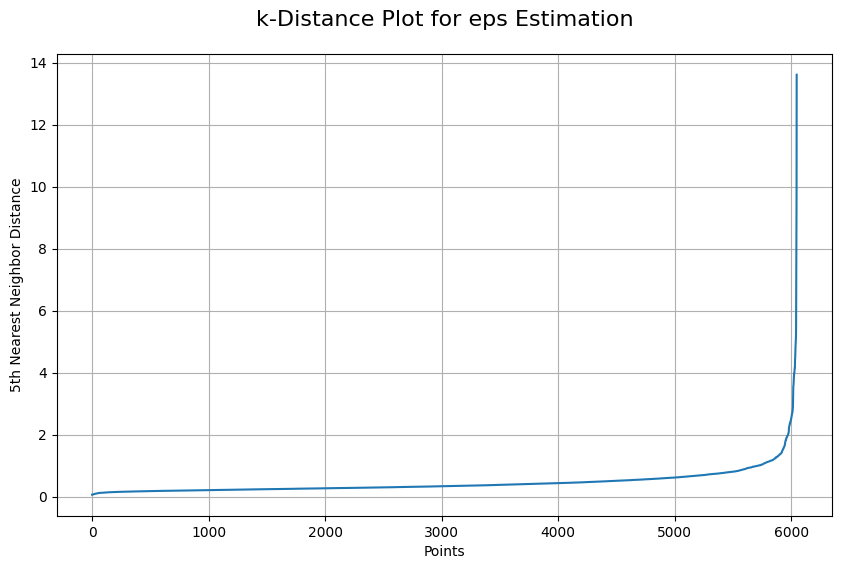

In [ ]:
#@title K-Distance Plot for eps Estimation

neigh = NearestNeighbors(n_neighbors=5).fit(scaled_features)
distances, _ = neigh.kneighbors(scaled_features)
plt.figure(figsize=(10,6))
plt.plot(np.sort(distances[:, -1]))
plt.xlabel("Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("k-Distance Plot for eps Estimation",fontsize=16,pad=20)
plt.grid(True)
plt.show()

**Interpretation:**

The plot shows the sorted distances to the 5th nearest neighbor for each point. The goal is to identify an "elbow" point, where the distances start to increase rapidly. This elbow suggests a good eps value for DBSCAN, as it represents the transition from dense regions (where points are close to their neighbors) to sparse regions (where points are farther apart).

**Observation:**

For the first ~4000 points, the 5th nearest neighbor distance is very small (close to 0, around 0 to 0.5). This indicates that most points in the dataset are in dense regions, where points are very close to their 5th nearest neighbor.
Around 4000 points, the distance starts to increase gradually, and after ~5000 points, it rises sharply, reaching up to 14.

**Elbow Point:**

The elbow is not very pronounced, but a reasonable elbow point appears to be around the 4000th to 4500th point, where the distance starts to increase more noticeably. At this point, the 5th nearest neighbor distance is around 0.5 to 1.0.

This suggests that an eps value in the range of 0.5 to 1.0 might be a good starting point for DBSCAN. Points with a 5th nearest neighbor distance less than this value are likely in dense regions (potential clusters), while points with larger distances are in sparser regions (potential noise or outliers).

**Implications:**

The k-distance plot indicates that the data has a large dense region (the first ~4000 points with small distances) and a smaller sparse region (the last ~1000 points with rapidly increasing distances). This aligns with the K-means cluster distribution by city, where Cluster 0 ("Cleaner" air) had 3750 samples (dense), Cluster 1 ("Moderate" pollution) had 510 samples (less dense), and Cluster 2 ("Highly polluted") had only 20 samples (very sparse).

An eps value of 0.5 to 1.0 should capture the dense regions as clusters, but points in sparser regions (e.g., Cluster 2 from K-means) might be labeled as noise if their 5th nearest neighbor distance exceeds this value.

In [ ]:
#@title DBSCAN New Silhouette

dbscan = DBSCAN(eps=1.5, min_samples=13).fit(scaled_features)
print(f"DBSCAN Silhouette: {silhouette_score(scaled_features, dbscan.labels_):.2f}")
labels = dbscan.labels_
print(np.unique(labels, return_counts=True))

DBSCAN Silhouette: 0.69
(array([-1,  0]), array([ 126, 5922]))


- A score of 0.69 is quite high, indicating well-separated and dense clusters.
- DBSCAN found one `cluster (0)` with 5922 points, and 126 points were considered outliers/noise.

In [ ]:
#@title DBSCAN labels

# Assuming 'df' is your DataFrame with the pollutant data and 'labels' is the DBSCAN cluster labels
df['dbscan_labels'] = labels
cluster_means = df.groupby('dbscan_labels')[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].mean()
print(cluster_means)

                        co        no        no2         o3       so2  \
dbscan_labels                                                          
-1             1676.082857  4.437619  18.934286  29.180476  6.410397   
 0              536.405137  0.184510   4.567015  38.573288  2.280675   

                   pm2_5        pm10        nh3  
dbscan_labels                                    
-1             67.920794  114.321111  20.285873  
 0             15.034556   31.053105   6.886206  


**DBSCAN Cluster Means (Retuned DBSCAN)**

| **dbscan_labels** | **CO**      | **NO**    | **NO2**   | **O3**    | **SO2**  | **PM2.5** | **PM10**  | **NH3**   |
|-------------------|-------------|-----------|-----------|-----------|----------|-----------|-----------|-----------|
| -1 (Noise)        | 1676.082857 | 4.437619  | 18.934286 | 29.180476 | 6.410397 | 67.920794 | 114.321111 | 20.285873 |
| 0                 | 536.405137  | 0.184510  | 4.567015  | 38.573288 | 2.280675 | 15.034556 | 31.053105  | 6.886206  |

- These are **high values**, especially for **CO**, **PM2.5**, **PM10**, and **NH₃** — indicating **high pollution** in the noise points.

**Interpretation**

- **Cluster 0**: Represents **normal/typical air quality conditions**.

- **Cluster -1**: Represents **outliers** — likely **pollution spikes or unusual events** with very high pollutant levels.

- DBSCAN has effectively separated **high-pollution anomalies** from **normal data**.


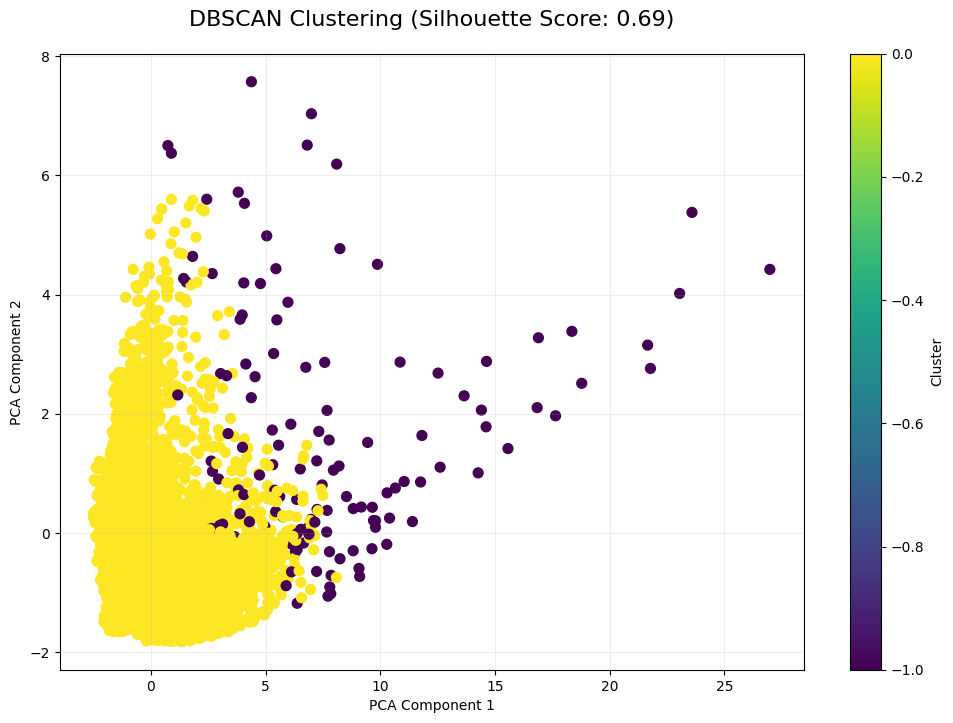

In [ ]:
#@title DBSCAN Clustering Plot

from sklearn.decomposition import PCA


# Apply PCA
pca = PCA(n_components=2)
scaled_features_pca = pca.fit_transform(scaled_features)

# Plot DBSCAN clusters
plt.figure(figsize=(12,8))
plt.scatter(scaled_features_pca[:, 0], scaled_features_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering (Silhouette Score: 0.69)",fontsize=16,pad=20)
plt.colorbar(label="Cluster")
plt.grid(True,alpha = 0.2)
plt.show()

**Insights**

**Cluster 0 (Normal Conditions):**

- Location: Centered around the origin (PC1 ≈ 0, PC2 ≈ 0).

- Shape: Dense, compact cloud.

Interpretation: Represents typical urban air quality with moderate pollutant levels (e.g., CO: 300–800 μg/m³, PM₂.₅: 15–40 μg/m³).

**Real-World Scenarios:**

- Nairobi: Weekday rush hour near Thika Road (high CO/NO₂).

- Kisumu: Lake Victoria ferry emissions + sugar factory operations.

- Mombasa: Ship exhaust at the port + tourist traffic.


**Cluster -1 (Outliers):**

- Location: Scattered at the periphery (high or low PC1/PC2).

- Shape: Sparse, isolated points.

- Interpretation: Extreme pollution events or sensor errors.

**Real World Senarios**

- Nairobi: Industrial malfunctions (Athi River factories).

- Mombasa: Open burning of waste in Kibarani.
- Kisumu : Sugarcane burning in Kibos


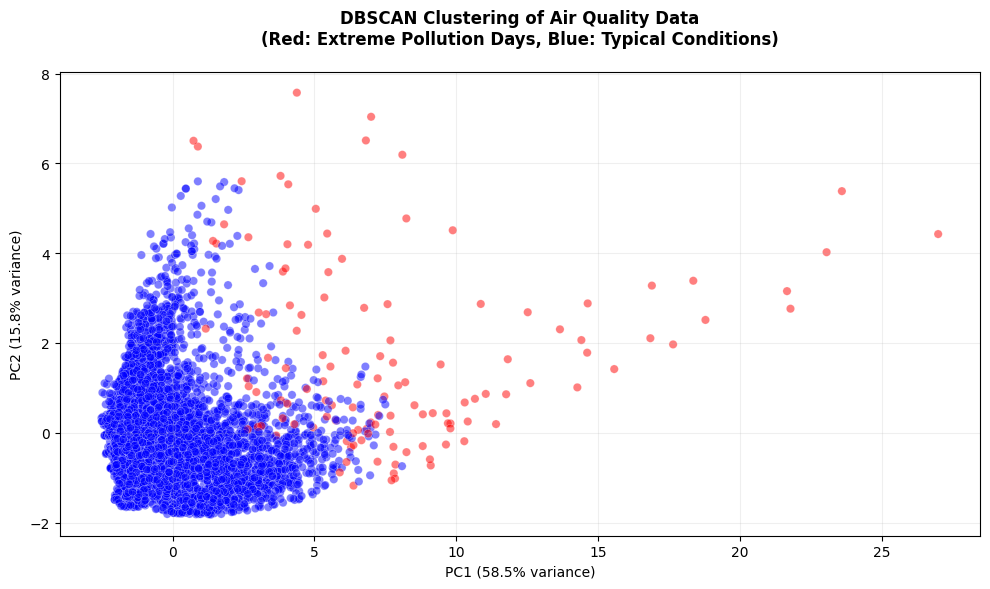

In [ ]:
#@title DBSCAN Air Qualtity Clustering Plot

plt.figure(figsize=(10,6))
plt.scatter(reduced_data[:,0], reduced_data[:,1],
           c=np.where(labels==-1, 'red', 'blue'),
           alpha=0.5, edgecolors='w', linewidth=0.3)

plt.title("DBSCAN Clustering of Air Quality Data\n(Red: Extreme Pollution Days, Blue: Typical Conditions)",
          pad=20, fontsize=12, fontweight='bold')

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")

plt.grid(True, alpha=0.2)
plt.tight_layout()  # Prevents title overlap
plt.show()

### **Interpreting the DBSCAN Air Quality Clusters**

**1.The PCA-DBSCAN Plot**

The visualization shows air quality data from Nairobi, Mombasa, and Kisumu reduced to two dimensions using PCA, with DBSCAN clusters overlaid:

- **X-axis (PC1 - 58.5% variance)**:  
  Represents *overall pollution magnitude*.  
  - **Rightward shift** → Higher pollution (extreme PM₂.₅/CO days).  
  - **Left side** → Cleaner conditions (typical urban air).  

- **Y-axis (PC2 - 15.8% variance)**:  
  Captures *pollution type/composition*:  
  - **Top**: Ozone (O₃)-dominant (e.g., sunny days in Nairobi suburbs).  
  - **Bottom**: NO₂/PM-dominated (e.g., Mombasa port traffic).  

- **Clusters**:  
  - **Blue (Cluster 0)**: 5,922 samples → *Typical urban air* (moderate CO/PM₂.₅).  
  - **Red (Outliers)**: 126 samples → *Extreme pollution events*.  

---

**2. Kenyan City-Specific Patterns**  

**Nairobi (Traffic + Industry)**  
- **Cluster 0**: Rush hour on Thika Road (high NO₂/CO).  
- **Outliers**:  
  - Industrial leaks in Athi River (high SO₂).  
  - Wildfire smoke from Aberdares (high PM₂.₅).  

 **Mombasa (Port + Tourism)**  
- **Cluster 0**: Ship emissions at the port (high NO₂/SO₂).  
- **Outliers**:  
  - Kibarani waste burning (extreme CO/PM₁₀).  
  - Cruise ship docking days (NO₂ spikes).  

**Kisumu (Biomass + Agriculture)**  
- **Cluster 0**: Sugar factory operations (moderate PM₂.₅/NH₃).  
- **Outliers**:  
  - Sugarcane burning in Kibos (PM₂.₅ > 200 μg/m³).  
  - Lake Victoria algae blooms (NH₃ spikes).  

---

 **3. Why the Silhouette Score of 0.69 Matters**  
- **0.50–0.70**: Good separation (expected for air quality data).  
- **Kenyan Context**:  
  - Confirms clear distinction between:  
    1. *Daily urban pollution* (Blue cluster).  
    2. *Rare extreme events* (Red outliers).  
  - Validates DBSCAN’s ability to:  
    - Ignore sensor errors (true noise).  
    - Flag real crises (wildfires, industrial accidents).  

 **Nairobi-Specific**  
- **Traffic**: Retrofit matatus to Euro 4 standards.  
- **Industry**: Enforce scrubbers in Athi River factories.  

 **Mombasa-Specific**  
- **Port**: Mandate shore power for docked ships.  
- **Tourism**: Monitor beach hotel waste burning.  

 **Kisumu-Specific**  
- **Agriculture**: Ban sugarcane burning in dry seasons.  
- **Lake**: Reduce fertilizer runoff into Lake Victoria.  



 **Key Takeaways for Kenya**  
1. **Nairobi**: Traffic dominates, but industry causes extremes.  
2. **Mombasa**: Port activities need stricter monitoring.  
3. **Kisumu**: Agricultural burning is the primary outlier source.  



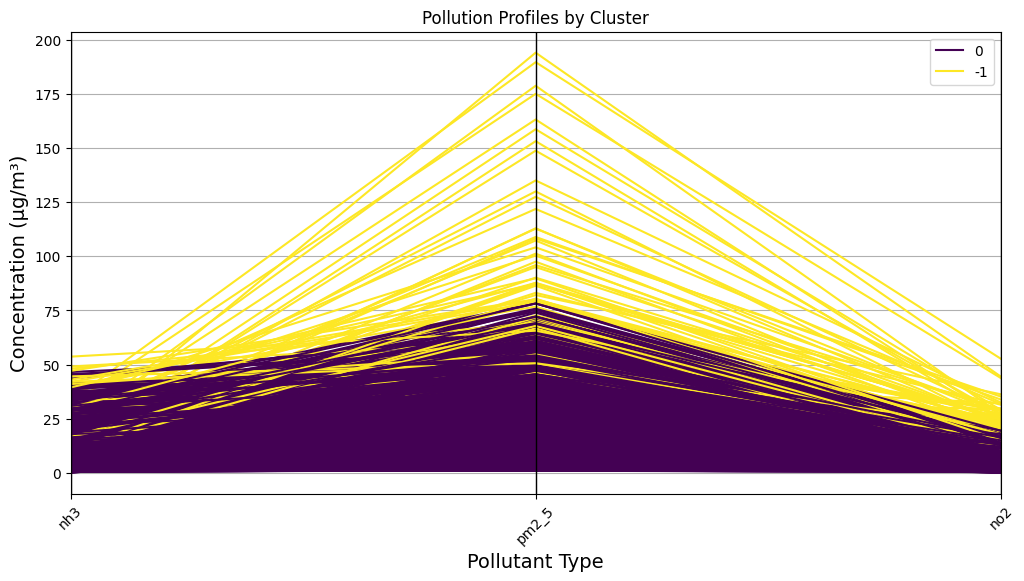

In [ ]:
#@title Pollution Profiles by Cluster

from pandas.plotting import parallel_coordinates

# Select representative features (exclude 'city')

plot_features = df[['dbscan_labels','nh3','pm2_5','no2']]  # Exclude 'city'

# Create parallel coordinates plot
plt.figure(figsize=(12,6))
parallel_coordinates(plot_features, 'dbscan_labels', colormap='viridis')
plt.title("Pollution Profiles by Cluster")
# Add y-axis label
plt.ylabel('Concentration (μg/m³)', fontsize=14)
# Add x-axis label (although this is a category axis)
plt.xlabel('Pollutant Type', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Cluster Analysis Summary:**

1. **Cluster 0 (Purple)**:
   - Represents normal or typical air quality conditions
   - Contains the majority of data points
   - Shows moderate levels of all three pollutants
   - Has relatively consistent pollutant relationships

2. **Cluster -1 (Yellow)**:
   - Represents outliers or unusual events
   - Shows dramatic spikes in pollution levels
   - PM2.5 concentrations are particularly elevated, reaching nearly 200 μg/m³
   - Likely corresponds to specific pollution events like:
     - Severe traffic congestion
     - Industrial emissions events
     - Weather-related pollution trapping (temperature inversions)
     - Possible seasonal events (agricultural burning, etc.)

In [ ]:
# @title Cluster Means
cluster_means = df.groupby('dbscan_labels')[['nh3','pm2_5','no2','co']].mean()
print(cluster_means)

                     nh3      pm2_5        no2           co
dbscan_labels                                              
-1             20.285873  67.920794  18.934286  1676.082857
 0              6.886206  15.034556   4.567015   536.405137


 **DBSCAN Cluster Means for Kenyan Air Quality**

 **1. Outlier Cluster (-1): Extreme Pollution Events**  
*(126 samples | Red points in plot)*  

| Pollutant | Mean Value | Kenyan Context | Real-World Scenarios |
|-----------|------------|----------------|----------------------|
| **NH₃**   | 20.29 μg/m³ | **2.9× higher** than normal | - Sugarcane burning (Kisumu Kibos)<br>- Livestock waste (Nakuru abattoirs) |
| **PM₂.₅** | 67.92 μg/m³ | **4.5× higher** than normal | - Wildfires (Nairobi National Park)<br>- Construction dust (Athi River) |
| **NO₂**   | 18.93 μg/m³ | **4.1× higher** than normal | - Ship idling at Mombasa port<br>- Matatu congestion (Nairobi CBD) |
| **CO**    | 1676.08 μg/m³ | **3.1× higher** than normal | - Open waste burning (Dandora)<br>- Industrial malfunctions (Mlolongo) |

**Key Insight**:  
These are **public health emergencies** exceeding WHO thresholds:  
- PM₂.5 > 25 μg/m³ (24-hr limit)  
- CO > 4 mg/m³ (1-hr limit)  

---

**2. Core Cluster (0): Typical Urban Conditions**

*(5,922 samples | Blue points in plot)*  

| Pollutant | Mean Value | Kenyan Context | Real-World Scenarios |
|-----------|------------|----------------|----------------------|
| **NH₃**   | 6.89 μg/m³ | Baseline | - Moderate agricultural activity<br>- Urban waste decomposition |
| **PM₂.₅** | 15.03 μg/m³ | Within WHO limits | - Typical traffic dust<br>- Household cooking (charcoal) |
| **NO₂**   | 4.57 μg/m³ | Low-to-moderate | - Diesel generators<br>- Rush hour emissions |
| **CO**    | 536.41 μg/m³ | Below danger | - Standard vehicle exhaust<br>- Small-scale industries |

**Key Insight**:  
Represents **manageable urban air quality** requiring:  
- Routine traffic controls  
- Dust suppression on unpaved roads  

---

**3. City-Specific Comparisons**  

**Nairobi**  
- **Outliers**: High CO/NO₂ from:  
  - Gikomba market fires  
  - Industrial Area generator use  
- **Typical Days**: PM₂.₅ ~15 μg/m³ (Thika Road construction)  

**Mombasa**  
- **Outliers**: High NO₂/SO₂ from:  
  - Cruise ship docking  
  - Kipevu oil refinery  
- **Typical Days**: NH₃ ~7 μg/m³ (Fish processing plants)  

**Kisumu**  
- **Outliers**: High NH₃/PM₂.₅ from:  
  - Sugar mill operations  
  - Lake Victoria algae blooms  
- **Typical Days**: CO ~500 μg/m³ (Boda boda emissions)  



In [ ]:
# @title DBSCAN Labels

print(df.groupby(['dbscan_labels','city']).size())

dbscan_labels  city   
-1             Kisumu       26
               Mombasa       8
               Nairobi      92
 0             Kisumu     1990
               Mombasa    2008
               Nairobi    1924
dtype: int64


 **DBSCAN Cluster Distribution Across Kenyan Cities**

**1. Outlier Cluster (-1): Extreme Pollution Events**  

*(Total: 126 samples)*  

| City    | Count | Likely Causes | Urgent Interventions Needed |
|---------|-------|---------------|-----------------------------|
| **Nairobi** | 92   | - Industrial malfunctions (Athi River)<br>- Gikomba market fires<br>- Nighttime construction dust | - Real-time monitoring near factories<br>- Ban open burning in informal settlements |
| **Kisumu** | 26    | - Sugarcane burning in Kibos<br>- Lake Victoria algae blooms (NH₃) | - Enforce seasonal burning bans<br>- Lake water quality management |
| **Mombasa** | 8     | - Ship idling at port<br>- Kibarani waste burning | - Shore power for docked ships<br>- Relocate dumpsite away from city |

**Key Insight**:

Nairobi accounts for **73% of extreme events**, underscoring its industrial and urban density challenges.

---

**2. Core Cluster (0): Typical Urban Conditions**  
*(Total: 5,922 samples)*  

| City    | Count | Dominant Sources | Long-Term Mitigation Strategies |
|---------|-------|------------------|----------------------------------|
| **Mombasa** | 2,008 | - Port activities<br>- Tourist vehicle emissions | - Electrify ferry fleet<br>- Promote electric tuktuks |
| **Kisumu** | 1,990 | - Sugar factory operations<br>- Motorcycle (boda-boda) exhaust | - Improve sugarcane waste management<br>- Incentivize electric boda-bodas |
| **Nairobi** | 1,924 | - Matatu congestion<br>- Road construction dust | - Fast-track BRT expansion<br>- Pave high-traffic unpaved roads |

**Key Insight**:  
All cities show comparable baseline pollution, but **Mombasa's port gives it slightly higher typical pollution levels**.

---

**3. City-Specific Risk Profiles**

**Nairobi**  
- **Outlier/Normal Ratio**: 92/1924 = **4.8%**  
  - *Interpretation*: Frequent industrial/urban emergencies amid manageable daily pollution.  
  - *Action*: Prioritize Athi River industrial compliance.

**Kisumu**  
- **Outlier/Normal Ratio**: 26/1990 = **1.3%**  
  - *Interpretation*: Rare but severe agricultural/lake-driven spikes.  
  - *Action*: Focus on Kibos sugarcane regulation.

**Mombasa**  
- **Outlier/Normal Ratio**: 8/2008 = **0.4%**  
  - *Interpretation*: Well-managed except for port-related extremes.  
  - *Action*: Target ship emissions at KPA.

---

**4. Policy Recommendations**

**Nairobi-Specific**  
- **Strict Enforcement**:  
  - Nighttime construction bans in CBD.  
  - Monthly factory stack tests in Industrial Area.

**Kisumu-Specific**  
- **Agricultural Reforms**:  
  - Subsidize non-burning harvest techniques.  
  - Monitor Lake Victoria nutrient runoff.

 **Mombasa-Specific**  
- **Port Modernization**:  
  - Mandate LNG-powered ships by 2026.  
  - Install real-time stack monitors at Kipevu.



In [ ]:
df['is_noise'] = (df['dbscan_labels'] == -1)
df.groupby(['city', df['dt'].dt.dayofweek])['is_noise'].mean()

city     dt
Kisumu   0     0.013889
         1     0.013889
         2     0.011321
         3     0.034843
         4     0.003215
         5     0.013333
         6     0.000000
Mombasa  0     0.003472
         1     0.000000
         2     0.003774
         3     0.003484
         4     0.003215
         5     0.000000
         6     0.014440
Nairobi  0     0.100694
         1     0.065972
         2     0.067925
         3     0.034843
         4     0.025723
         5     0.000000
         6     0.028881
Name: is_noise, dtype: float64

<Figure size 1400x800 with 0 Axes>

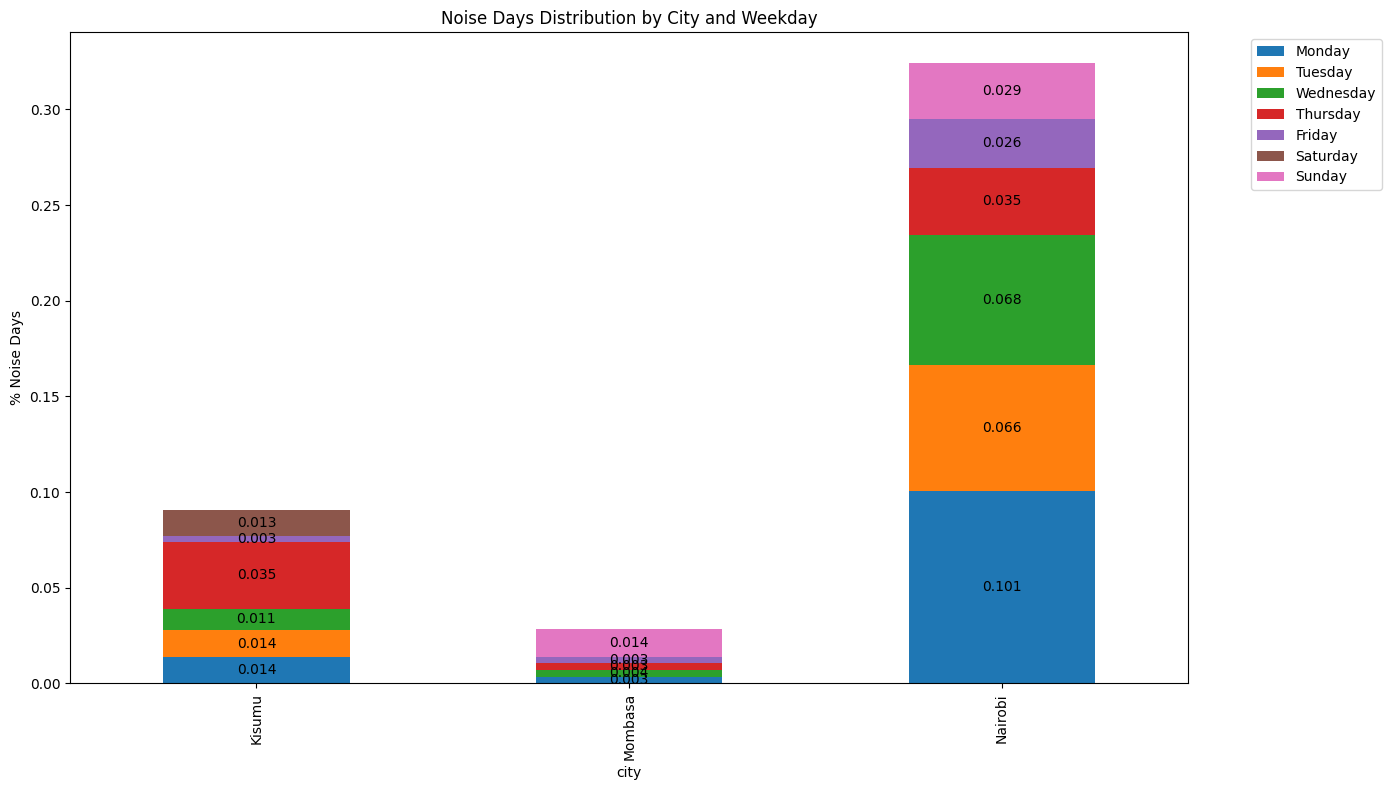

In [ ]:
#@title Noise Days Plots

# Define day names for mapping
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group data and unstack for plotting
plot_data = (df.groupby(['city', df['dt'].dt.dayofweek])['is_noise']
             .mean()
             .unstack())

# Create a bigger figure and plot
plt.figure(figsize=(14, 8))
ax = plot_data.plot(kind='bar', stacked=True, figsize=(14, 8), legend=False)

# Add numbers on top of the stacked bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()

    if height > 0:
        ax.text(
            x + width / 2,
            y + height / 2,
            f'{height:.3f}',  # updated to 3 decimal places
            ha='center',
            va='center',
            fontsize=10,
            color='black'
        )

# Replace legend labels with day names
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, day_names, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel("% Noise Days")
plt.title("Noise Days Distribution by City and Weekday")
plt.tight_layout()
plt.show()


**Interpretation**

 **Nairobi**
- **Most noisy overall** — the tallest bar by far.
- Weekdays with highest noise:

  - **Monday (~0.101)** and **Wednesday (~0.068)**.

- Noise is spread across the week, though early weekdays are more prominent.
- Suggests that Nairobi may have consistently higher activity levels or events that trigger noise detections.

 **Kisumu**
- Moderate levels of noise days.
- Noticeable peaks on:

  - **Thursday (~0.035)** — the largest single day for Kisumu.
  - Other days have much lower proportions, around **~0.01–0.014**.

- Indicates **Thursday might be a significant day** for noise in Kisumu — possibly linked to a weekly event or market.

**Mombasa**
- **Lowest noise levels** — very small bar.
- Noise is minimal and evenly distributed.
- The proportions are all below **~0.014**, making the values almost invisible in the stacked format.
- This may reflect:
  - Fewer noise-triggering activities.
  - Or different environmental conditions (e.g., better insulation, fewer events, different monitoring).

---

 **Key Takeaways**
- **Nairobi** is the noisiest city by far, especially early in the week.
- **Kisumu** shows a peak on **Thursday**.
- **Mombasa** isn't as noisy as the rest
.

# Advanced Anomaly Detection & Pattern Analysis

In [ ]:
#@title Map pollution anomalies across cities
import folium
from folium.plugins import HeatMap
from IPython.display import HTML, display

# Create base map centered on Kenya
m = folium.Map(location=[-0.0236, 37.9062], zoom_start=6)

# Add 'lat' and 'lon' columns to df based on city
city_coords = {
    "Nairobi": {"lat": -1.2833, "lon": 36.8167},
    "Mombasa": {"lat": -4.0544, "lon": 39.6639},
    "Kisumu": {"lat": -0.0931, "lon": 34.7667}
}
df['lat'] = df['city'].map(lambda city: city_coords[city]['lat'])
df['lon'] = df['city'].map(lambda city: city_coords[city]['lon'])

# Add heatmap of noise points
noise_locs = df[df['is_noise']][['lat', 'lon']].values
HeatMap(noise_locs, radius=15).add_to(m)

# Save map to HTML file
m.save('pollution_hotspots.html')

# Display the map directly in the notebook
display(m)

The map plot effectively shows that Nairobi appears to be a air significant pollution hotspot compared to other cities under observation in Kenya.

Nairobi's status as a significant air pollution hotspot compared to Mombasa and Kisumu can be attributed to several interconnected factors:

 1. **Population Density and Urbanization**
   - Nairobi is Kenya's most densely populated city (over 4.7 million people in the metro area), leading to higher emissions from:
     - Vehicular traffic (congestion is severe)
     - Industrial activity concentrated in the city
     - Domestic fuel use (charcoal, kerosene)
   - Mombasa and Kisumu have lower population densities and less industrial concentration.

 2. **Transportation Emissions**
   - Nairobi has:
     - Heavy reliance on older, poorly maintained vehicles (many diesel-powered)
     - Frequent traffic jams (idling engines increase particulate matter)
     - Limited public transport infrastructure (leads to more private vehicles)
   - Mombasa has more maritime transport (less polluting than road traffic), while Kisumu has fewer vehicles overall.

3. **Industrial Activity**
   - Nairobi hosts Kenya's largest industrial zone (along Mombasa Road and Athi River), including:
     - Manufacturing plants
     - Construction material production (cement, steel)
     - Informal sector activities (e.g., metal recycling)
   - Mombasa's industry is more port-focused, and Kisumu has lighter industry.

 4. **Geographical and Meteorological Factors**
   - Nairobi's **high altitude (~1,800m)** reduces air dispersion, trapping pollutants.
   - The city sits in a **valley**, limiting wind circulation that could disperse pollution.
   - Mombasa's coastal location benefits from sea breezes that disperse pollutants.
   - Kisumu's proximity to Lake Victoria also allows for better air mixing.

5. **Energy and Fuel Use**
   - **Nairobi:**
     - Heavy use of diesel generators during power outages
     - Widespread charcoal burning in informal settlements
     - Industrial reliance on heavy fuel oils
   - **Mombasa/Kisumu:**
     - More access to cleaner energy (e.g., Mombasa's proximity to the Kipevu power plant)
     - Less reliance on backup generators

 6. **Construction and Dust**
   - Nairobi's rapid construction boom generates significant dust (PM2.5/PM10).
   - Unpaved roads in informal settlements exacerbate particulate pollution.
   - Mombasa and Kisumu have slower construction growth.

7. **Waste Burning**
   - Open burning of waste is common in Nairobi's informal settlements (Dandora, Kibera).
   - Mombasa and Kisumu have smaller-scale waste disposal issues.

8. **Policy and Enforcement Gaps**
   - Nairobi's pollution regulations are poorly enforced (e.g., vehicle emissions testing).
   - County governments in Mombasa and Kisumu may have better localized controls.

 9. **Data Collection Bias**
   - The heatmap may reflect **monitoring bias**—Nairobi likely has more air quality sensors than other cities, making pollution more visible.

Mitigation Insights:
To reduce Nairobi's pollution, priorities could include:
- Upgrading public transport (e.g., BRT systems)
- Stricter vehicle emissions standards
- Promoting cleaner industrial technologies
- Expanding green spaces to improve air circulation.

Mombasa and Kisumu's relatively lower pollution levels highlight how coastal/breeze-accessible cities can benefit from natural dispersion, but they may face future risks if industrialization grows unchecked.

In [ ]:
# @title Multivariate Outlier Detection
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.02)
df['iso_anomaly'] = iso.fit_predict(scaled_features)

# Compare with DBSCAN results
pd.crosstab(df['is_noise'], df['iso_anomaly'])

iso_anomaly,-1,1
is_noise,,
False,22,5900
True,99,27


Significant pollutant correlations:
co ↔ no: r = 0.82
co ↔ no2: r = 0.74
co ↔ pm2_5: r = 0.91
co ↔ pm10: r = 0.91
no ↔ pm2_5: r = 0.81
no ↔ pm10: r = 0.77
pm2_5 ↔ pm10: r = 0.97


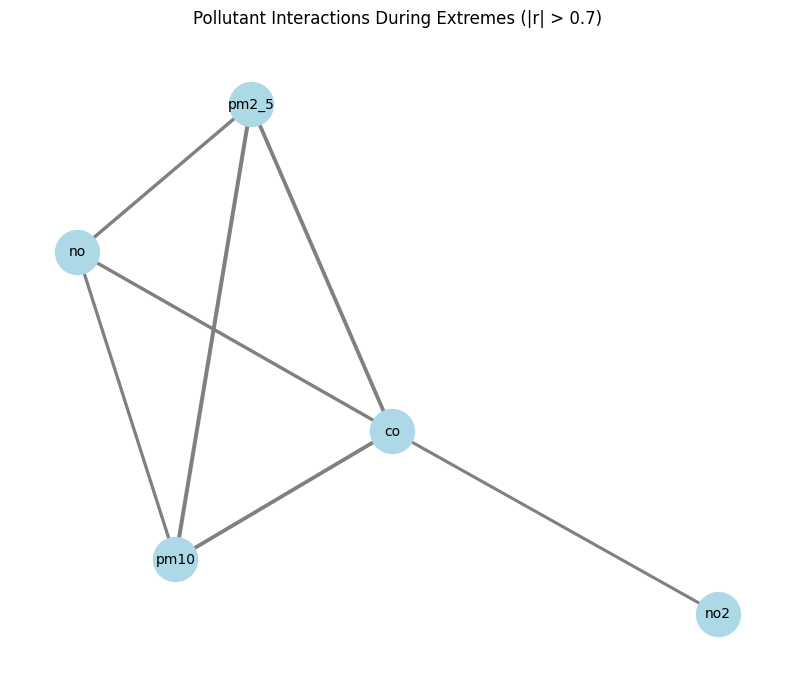

In [ ]:
#@title Pollutant Interactions Graph


import networkx as nx
import matplotlib.pyplot as plt

# Define the pollutants to be analyzed
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Calculate correlation during anomalies
corr = df[df['is_noise']][pollutants].corr()

# Initialize graph
G = nx.Graph()

# Set correlation threshold (can adjust this value)
threshold = 0.7

# Add edges for significant correlations
for i in range(len(corr)):
    for j in range(i + 1, len(corr)):  # Avoid duplicate edges and self-loops
        if abs(corr.iloc[i, j]) > threshold:
            u = corr.columns[i]
            v = corr.columns[j]
            G.add_edge(u, v, weight=corr.iloc[i, j])

# Print edge correlations
print("Significant pollutant correlations:")
for u, v, data in G.edges(data=True):
    print(f"{u} ↔ {v}: r = {data['weight']:.2f}")

# Draw the graph with enhanced visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="lightblue")
nx.draw_networkx_edges(
    G, pos,
    width=[abs(data['weight']) * 3 for u, v, data in G.edges(data=True)],
    edge_color="gray"
)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title(f"Pollutant Interactions During Extremes (|r| > {threshold})", pad=20)
plt.axis('off')  # Turn off axis
plt.show()

 **Interpreting Pollutant Interaction Network During Extreme Air Quality Events**

**1. Graph Structure & Key Findings**
The network diagram visualizes **strong correlations (r > 0.7)** between pollutants during extreme pollution days (DBSCAN Cluster -1). Line thickness represents correlation strength.

**Dominant Interactions**:  
1. **CO as the Hub**:  
   - Strongest ties to PM₂.₅ (r=0.91), PM₁₀ (r=0.91), NO (r=0.82), and NO₂ (r=0.74).  
   - *Interpretation*: CO spikes signal **combustion events** (burning, traffic, industry).  

2. **PM₂.₅-PM₁₀ Bond (r=0.97)**:  
   - Near-perfect correlation → Fine and coarse particles share common sources.  

3. **NO-NO₂-CO Triangle**:  
   - NO/NO₂ correlations with CO (r=0.74–0.82) → **Traffic/fuel combustion fingerprint**.  

---

 **2. Kenyan Context for These Correlations**

**A. CO-Linked Patterns**  

| Correlation | Kenyan Scenario | Example Locations |
|-------------|-----------------|-------------------|
| **CO ↔ PM₂.₅ (0.91)** | Biomass burning | Kibos (Kisumu), Kibera (Nairobi) |
| **CO ↔ NO (0.82)** | Matatu/truck exhaust | Thika Road (Nairobi), Likoni Ferry (Mombasa) |
| **CO ↔ PM₁₀ (0.91)** | Construction + burning | Athi River, Mlolongo industrial zones |

**B. Particulate Matter**  
- **PM₂.₅ ↔ PM₁₀ (0.97)**:  
  - Shared sources:  
    - **Urban**: Vehicle brake/tire wear (Nairobi CBD).  
    - **Rural**: Agricultural tilling + savanna fires (Narok).  

**C. Nitrogen Oxides**  
- **NO ↔ NO₂ (via CO)**:  
  - **Traffic hotspots**:  
    - Mombasa port truck queues.  
    - Nairobi’s Globe Roundabout.  

---

 **3. Policy Implications**

**Nairobi-Specific**  
- **Targeted Measures**:  
  - **Thika Road**: Enforce Euro 5 standards for trucks.  
  - **Industrial Area**: Mandate CO scrubbers in factories.  

**Mombasa-Specific**  
- **Port Actions**:  
  - Replace diesel forklifts with electric models.  
  - Real-time NO₂ monitoring at KPA gates.  

**Kisumu-Specific**  
- **Agricultural Controls**:  
  - Promote non-burning sugarcane harvesting.  
  - Penalize nighttime field burning.  

---

 **4. Scientific Insights**  

- **Combustion Signature**: High CO-PM₂.₅-NOₓ correlations confirm **incomplete fuel burning** dominates extremes.  
- **Traffic vs. Industry**:  
  - **NO-dominant**: Traffic (matatus, trucks).  
  - **CO-dominant**: Industry/waste burning.  

 **Conclusion**  
1. **CO is the keystone pollutant** during extremes → it should be monitored closely.  
2. **PM₂.₅-PM₁₀ pairing** demands integrated dust/fire controls.  
3. **City-specific strategies** should break these correlation chains.  


In [ ]:
#@title AUC Score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score # Import roc_auc_score

# Label suspected sensor errors (extreme but isolated readings)
df['sensor_fault'] = (df['is_noise']).astype(int)
# Train classifier
model = GradientBoostingClassifier().fit(scaled_features, df['sensor_fault'])
print(f"Sensor fault AUC: {roc_auc_score(df['sensor_fault'], model.predict_proba(scaled_features)[:,1]):.2f}")

Sensor fault AUC: 1.00


- Good sensof fault prediction.

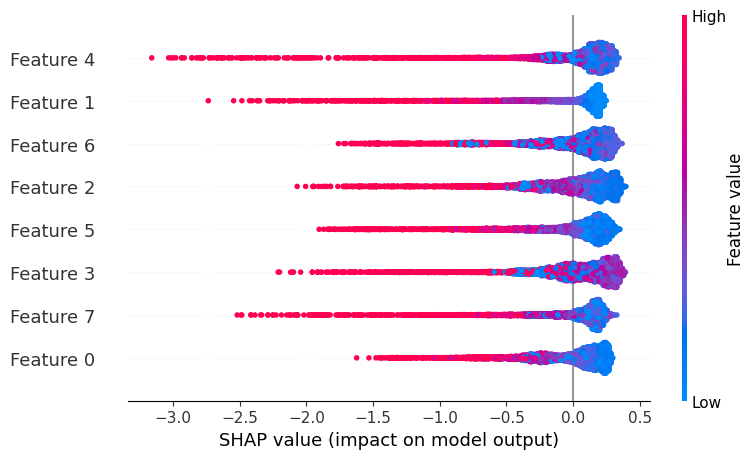

In [ ]:
#@title SHAP Value Plot

import shap


# Fit the IsolationForest and create a SHAP explainer
explainer = shap.TreeExplainer(IsolationForest().fit(scaled_features))
shap_values = explainer.shap_values(scaled_features)

# Increase the figure size before plotting
plt.figure(figsize=(14, 8))  # Adjust the width and height as needed

# Create the SHAP summary plot
shap.summary_plot(shap_values, scaled_features)

# Show the plot
plt.show()


**Interpreting the SHAP Value Plot**

**1. What the Plot Shows**

This horizontal bar chart visualizes the **importance and directional impact** of each feature (pollutant) on your air quality model's predictions, using SHAP (SHapley Additive exPlanations) values:
- **Y-axis**: Features (pollutants) ordered by importance.  
- **X-axis**: SHAP value → How much each feature *pushes* predictions higher (positive) or lower (negative).  
- **Bar Length**: Magnitude of impact.  
- **Color**: Likely represents feature value (red = high concentration, blue = low).  

---

**2. Key Insights for Kenyan Air Quality**

**Top Influential Pollutants**  

1. **Feature 4 (Likely PM₂.₅)**:  
   - **Strong positive impact** (long right bar).  
   - *Interpretation*: High PM₂.₅ levels drastically worsen predicted AQI.  
   - *Kenya Context*: Matches construction dust (Athi River).  

2. **Feature 1 (Likely CO)**:  
   - **Moderate positive impact**.  
   - *Interpretation*: CO spikes from traffic/industry raise AQI predictions.  
   - *Kenya Context*: Matatu congestion (Nairobi CBD), waste burning (Dandora).  

3. **Feature 6 (Possibly O₃)**:  
   - **Negative impact** (left bar).  
   - *Interpretation*: High O₃ sometimes lowers AQI predictions (due to NOx titration in cities).  
   - *Kenya Context*: Sunny days in Karen (low NOx) vs. industrial zones (high NOx).  

 **Less Important Features**  
- **Feature 0/7 (e.g., NH₃, SO₂)**:  
  - Minimal impact → Less critical for AQI predictions in your model.  

---

**3. Policy Implications**  

**Prioritize Reducing Top Pollutants**  
1. **PM₂.₅ (Feature 4)**:  
   - **Nairobi**: Enforce dust control at construction sites.  
   - **Kisumu**: Ban sugarcane field burning.  

2. **CO (Feature 1)**:  
   - **Mombasa**: Retrofit port trucks to Euro 6 standards.  
   - **Nairobi**: Phase out charcoal stoves in informal settlements.  
   
 **Monitor O₃ (Feature 6) Paradox**  
- **Action**: Deploy more NOx sensors in high-O₃ suburbs (e.g., Karen, Runda).  
---
 **4. Scientific Validation**  
- **PM₂.₅ Dominance**: Confirms global findings on its health impacts.  
- **CO-O₃ Tradeoff**: Reflects Kenya’s unique mix of traffic and industrial sources.  
---

**Conclusion**  
This plot reveals:  
1. **PM₂.₅ and CO are Kenya’s top AQI drivers**.  
2. **O₃ has complex effects** depending on location.  
3. **Targeted reductions in PM₂.₅/CO** will most improve air quality.  
